**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_starrmpra_res = dat
print(dim(dat))
head(dat)

[1] 5166   10


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr11,4539569,4540043,chr11_4539569_4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523
chr11,4551336,4552012,chr11_4551336_4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976
chr11,4553969,4555012,chr11_4553969_4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330
chr11,4569016,4569992,chr11_4569016_4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635
chr11,4577444,4578031,chr11_4577444_4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472
chr11,4601808,4602487,chr11_4601808_4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584


In [3]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.crispr.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_score_starrmpra_crispr = dat
print(dim(dat))
head(dat)

[1] 1722    6


Peak,RankNorm,CRISPR_pos,CRISPR_neg,CRISPR_count,Note
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chrX_48996933_48997220,0.002129307,0.00000000,0.0000000,0,NA
chr8_128298518_128298762,0.009291521,0.29710614,0.0000000,14,MYC:7|PVT1:7
chr8_128242220_128242507,0.039876113,0.01841620,-0.3771868,20,MYC:10|PVT1:10
chr11_34024311_34024546,0.040456833,0.00000000,0.0000000,0,NA
chr8_128189792_128190210,0.041231127,0.09226309,-0.1074660,22,MYC:11|PVT1:11
chr20_56703281_56703575,0.048199768,0.00000000,0.0000000,0,NA


In [4]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "results.enrich.merge.overall.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_enrich_total = dat
print(dim(dat))
head(dat)

[1] 763   9


Annotation,Label,pval,padj,log2err,ES,NES,size,nLogP
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ccre_v3,"CTCF-only,CTCF-bound",5.194805e-02,5.752738e-02,0.1957890,0.2931971,1.340765,80,1.2401254
ccre_v3,"dELS,CTCF-bound",3.978387e-03,4.735584e-03,0.4070179,0.4973922,1.850312,21,2.3246265
ccre_v3,dELS,7.026912e-13,1.605250e-12,0.9214260,0.5251367,2.457154,96,11.7944574
ccre_v3,"DNase-H3K4me3,CTCF-bound",1.113463e-02,1.285283e-02,0.3807304,0.5601636,1.785218,10,1.8910011
ccre_v3,DNase-H3K4me3,1.408591e-01,1.494792e-01,0.1128434,0.3977387,1.365310,14,0.8254193
ccre_v3,DNase-only,5.465597e-03,6.445519e-03,0.4070179,0.3858264,1.666815,50,2.1907421


In [5]:
dat = dat_enrich_total
table(dat$Annotation)


        ccre_v3         ccre_v4 ChIPseq_Histone      ChIPseq_TF        ChromHMM 
             11               8              12             713              15 
  CRISPRi_HCRFF        Enhancer        TSS_POL2 
              1               2               1 

In [6]:
dat = dat_enrich_total
summary(dat$nLogP)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    3.99   10.06   13.05   19.89   84.99 

## Set factor for plotting order

In [7]:
LABELS=dat_enrich_total %>% dplyr::arrange(nLogP) %>% pull(Label)
print(length(LABELS))
print(length(unique(LABELS)))

[1] 763
[1] 759


In [8]:
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% arrange(RankNorm)

PEAKS  = dat$Peak
ASSAYS = c("ASTARR", "WSTARR", "TMPRA")
print(dim(dat))
head(dat)

[1] 1722    6


Peak,RankNorm,CRISPR_pos,CRISPR_neg,CRISPR_count,Note
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chrX_48996933_48997220,0.002129307,0.00000000,0.0000000,0,NA
chr8_128298518_128298762,0.009291521,0.29710614,0.0000000,14,MYC:7|PVT1:7
chr8_128242220_128242507,0.039876113,0.01841620,-0.3771868,20,MYC:10|PVT1:10
chr11_34024311_34024546,0.040456833,0.00000000,0.0000000,0,NA
chr8_128189792_128190210,0.041231127,0.09226309,-0.1074660,22,MYC:11|PVT1:11
chr20_56703281_56703575,0.048199768,0.00000000,0.0000000,0,NA


## Set score for plotting: STARR/MPRA & CRISPR

In [9]:
dat = dat_peak_starrmpra_res
dat = dat %>% 
    dplyr::mutate(
        Assay = factor(Assay, levels=ASSAYS),
        Peak  = factor(Peak,  levels=PEAKS),
        Score = RankNorm_Total
    )

dat_score_starrmpra = dat
print(dim(dat))
head(dat)

[1] 5166   11


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
chr11,4539569,4540043,chr11_4539569_4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523,0.6550523
chr11,4551336,4552012,chr11_4551336_4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976,0.7560976
chr11,4553969,4555012,chr11_4553969_4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330,0.6556330
chr11,4569016,4569992,chr11_4569016_4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635,0.5673635
chr11,4577444,4578031,chr11_4577444_4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472,0.7154472
chr11,4601808,4602487,chr11_4601808_4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584,0.1277584


In [10]:
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% 
    dplyr::select(Peak, CRISPR_pos, CRISPR_neg) %>%
    tidyr::gather(Group, Score, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

dat_score_crispr = dat
print(dim(dat))
head(dat)

[1] 3444    3


Peak,Group,Score
<fct>,<chr>,<dbl>
chrX_48996933_48997220,CRISPR_pos,0.00000000
chr8_128298518_128298762,CRISPR_pos,0.29710614
chr8_128242220_128242507,CRISPR_pos,0.01841620
chr11_34024311_34024546,CRISPR_pos,0.00000000
chr8_128189792_128190210,CRISPR_pos,0.09226309
chr20_56703281_56703575,CRISPR_pos,0.00000000


## Plot: STARR/MPRA & CRISPR

In [11]:
THEME_TEXT = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "bold", size = 17)
    #plot.title = element_text(face = "plain", size = 17)
)

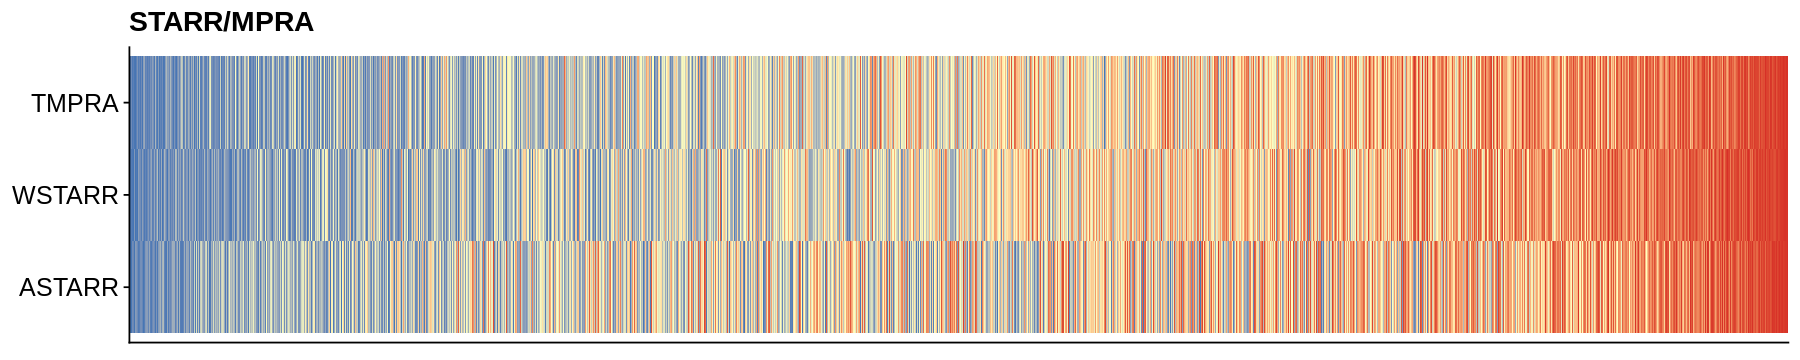

In [12]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "STARR/MPRA"
dat = dat_score_starrmpra

gpt = ggplot(dat, aes(x=Peak, y=Assay, fill=Score)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend

gpt_score_starrmpra = gpt + theme(legend.position = "none")

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

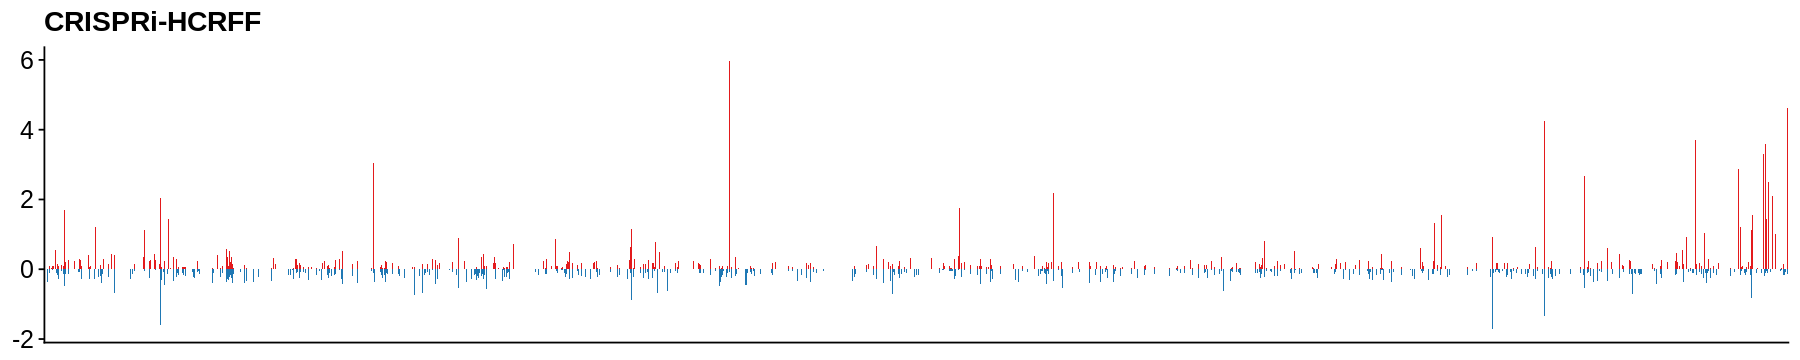

In [13]:
theme_fill = scale_fill_manual(
    values = c(
        "CRISPR_pos"="#e31a1c", 
        "CRISPR_neg"="#1f78b4")
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "CRISPRi-HCRFF"
dat = dat_score_crispr

gpt = ggplot(dat, aes(x=Peak, y=Score, fill=Group)) + 
    geom_bar(stat="identity", position="identity") + 
    labs(title = txt) +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend

gpt_score_crispr = gpt

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

## Import annotation: Enhancer

In [14]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.crispri_hcrff_casa.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Label = "CRISPR_CASA")

dat_peak_annot_casa = dat
print(dim(dat))
head(dat)

[1] 57  5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr11_33868682_33871379,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33880631_33881416,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33881831_33882405,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33936760_33937819,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33941500_33942221,CRISPRi_HCRFF,CRISPR_CASA,1,LMO2
chr11_33944510_33945297,CRISPRi_HCRFF,CRISPR_CASA,3,CAPRIN1|CAT|LMO2


In [15]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.enhancer_junke_peak_starr.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_enh = dat
print(dim(dat))
head(dat)

[1] 29012     5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr10_100009096_100010466,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100185017_100187275,Enhancer,Enhancer_STARR,1,WSTARR
chr10_100228452_100230090,Enhancer,Enhancer_STARR,1,ASTARR
chr10_100267066_100268374,Enhancer,Enhancer_STARR,2,ASTARR|WSTARR
chr10_100285974_100287341,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100346328_100347693,Enhancer,Enhancer_STARR,1,WSTARR


In [16]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.enhancer_zscore_junke_peak_starr.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Label = "Enhancer_STARR")

dat_peak_annot_enh_zscore = dat
print(dim(dat))
head(dat)

[1] 14856     5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr10_100185017_100187275,Enhancer,Enhancer_STARR,1,WSTARR
chr10_100346328_100347693,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100373060_100374238,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100528900_100530538,Enhancer,Enhancer_STARR,1,WSTARR
chr10_100535377_100536237,Enhancer,Enhancer_STARR,1,WSTARR
chr10_100912166_100913618,Enhancer,Enhancer_STARR,1,WSTARR


In [17]:
dat = dat_enrich_total

dat = dat %>% 
    dplyr::filter(Label %in% c("CRISPR_CASA", "Enhancer_ZScore_STARR")) %>%
    dplyr::mutate(Label = recode(Label, "Enhancer_ZScore_STARR" = "Enhancer_STARR"))

dat = dat %>% 
    dplyr::arrange(nLogP) %>% 
    dplyr::mutate(Label = factor(Label, levels=Label))

label = dat %>% pull(Label)

dat_enrich_enhancer = dat
print(dim(dat))
head(dat)

[1] 2 9


Annotation,Label,pval,padj,log2err,ES,NES,size,nLogP
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CRISPRi_HCRFF,CRISPR_CASA,9.805086e-08,1.575006e-07,0.7049757,0.5793107,2.365668,37,6.802718
Enhancer,Enhancer_STARR,8.523210e-65,3.251605e-62,2.1001888,0.7818340,3.772539,139,61.487902


In [18]:
###
dat = bind_rows(dat_peak_annot_casa, dat_peak_annot_enh_zscore)
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat = dat %>% dplyr::mutate(Label=factor(Label, levels=label))

###
dat_annot_enhancer = dat
print(dim(dat))
head(dat)

[1] 1722    3
[1] 3444    3


Peak,Label,Value
<fct>,<fct>,<chr>
chrX_48996933_48997220,CRISPR_CASA,0
chr8_128298518_128298762,CRISPR_CASA,0
chr8_128242220_128242507,CRISPR_CASA,0
chr11_34024311_34024546,CRISPR_CASA,0
chr8_128189792_128190210,CRISPR_CASA,0
chr20_56703281_56703575,CRISPR_CASA,0


In [19]:
table(dat$Label, dat$Value)

                
                    0    1
  CRISPR_CASA    1685   37
  Enhancer_STARR 1583  139

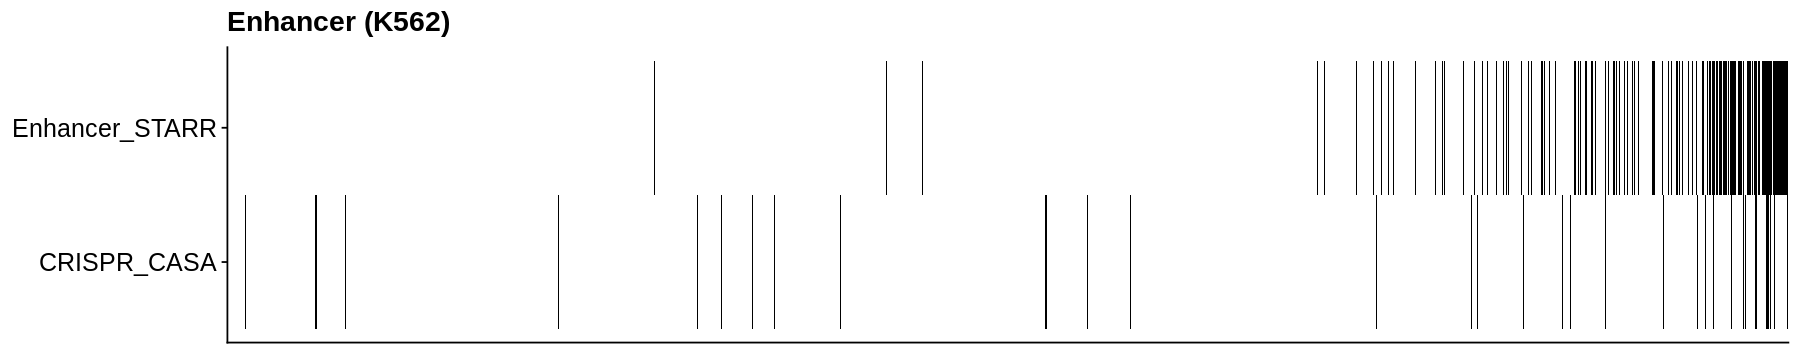

In [20]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "Enhancer (K562)"
dat = dat_annot_enhancer

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_enhancer = gpt
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

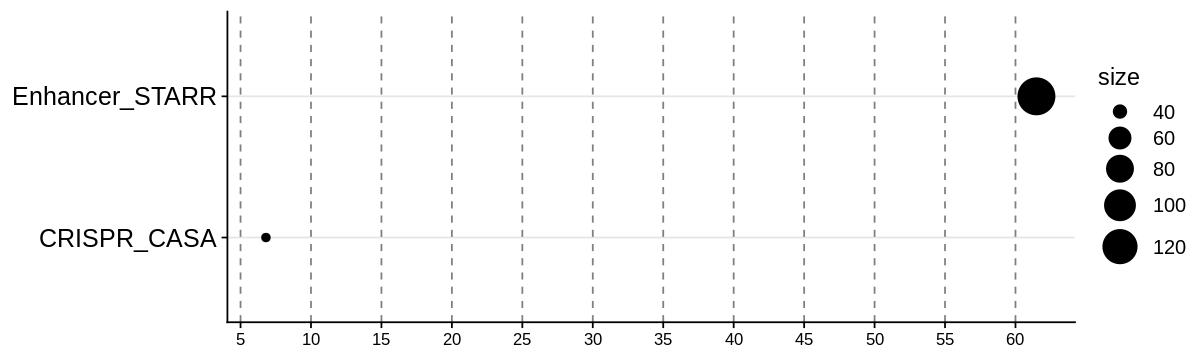

In [21]:
theme_text  = theme(
    axis.text.x  = element_text(size = 10),
    axis.text.y  = element_text(size = 15),
    axis.title   = element_blank()
)
theme_scale = scale_x_continuous(breaks = c(0, 1, 2, 3, seq(5, 85, by=5)))
theme_grid = theme(
    panel.grid.major.x = element_line(color = "grey50", linewidth = 0.5, linetype = 2),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = 1)
)

dat = dat_enrich_enhancer
gpt = ggplot(dat, aes(x=nLogP, y=Label, size=size)) +
     geom_point() +
     scale_size(range=c(2,10)) +
     theme_scale +
     theme_cowplot() +
     theme_grid +
     theme_text
     
gpt_enrich_enhancer = gpt
options(repr.plot.height=3, repr.plot.width=10)
print(gpt)

## Import annotation: TSS

In [87]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.tss_pol2.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_tss_pol2 = dat
print(dim(dat))
head(dat)

[1] 15191     4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,TSS_POL2,TSS,1
chr10_100185017_100187275,TSS_POL2,TSS,1
chr10_100228452_100230090,TSS_POL2,TSS,1
chr10_100267066_100268374,TSS_POL2,TSS,1
chr10_100285974_100287341,TSS_POL2,TSS,1
chr10_100346328_100347693,TSS_POL2,TSS,1


In [88]:
dat = dat_enrich_total

dat = dat %>% 
    dplyr::filter(Annotation == "TSS_POL2")

dat = dat %>% 
    dplyr::arrange(nLogP) %>% 
    dplyr::mutate(Label = factor(Label, levels=Label))

label = dat %>% pull(Label)

dat_enrich_tss_pol2 = dat
print(dim(dat))
head(dat)

[1] 1 9


Annotation,Label,pval,padj,log2err,ES,NES,size,nLogP
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSS_POL2,TSS,2.478795e-18,8.117255e-18,1.105337,0.5173473,2.517982,156,17.09059


In [89]:
###
dat = dat_peak_annot_tss_pol2
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat_annot_tss_pol2 = dat
print(dim(dat))
head(dat)

[1] 1722    2
[1] 1722    3


Peak,Label,Value
<fct>,<chr>,<chr>
chrX_48996933_48997220,TSS,0
chr8_128298518_128298762,TSS,0
chr8_128242220_128242507,TSS,0
chr11_34024311_34024546,TSS,0
chr8_128189792_128190210,TSS,0
chr20_56703281_56703575,TSS,0


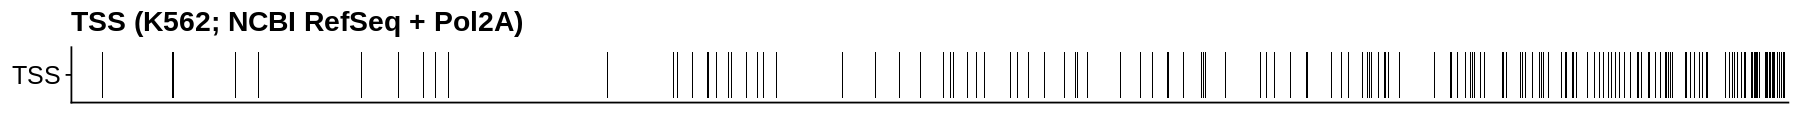

In [90]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "TSS (K562; NCBI RefSeq + Pol2A)"
dat = dat_annot_tss_pol2

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_tss_pol2 = gpt
options(repr.plot.height=1, repr.plot.width=15)
print(gpt)

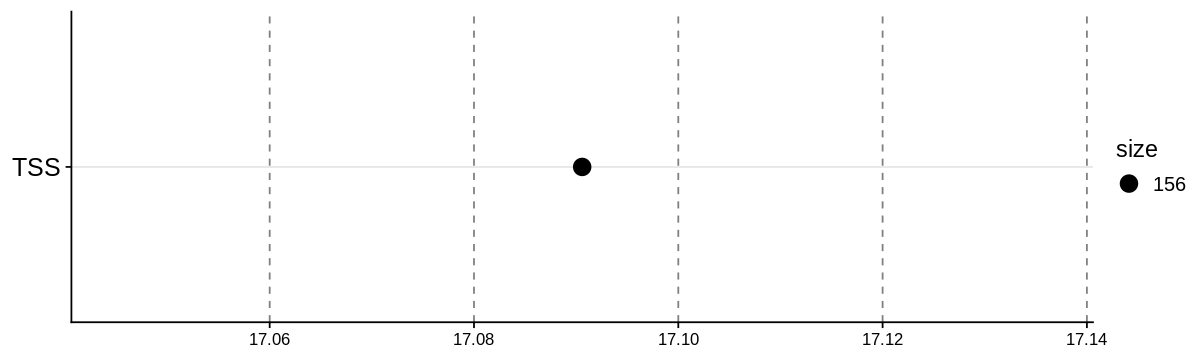

In [91]:
theme_text  = theme(
    axis.text.x  = element_text(size = 10),
    axis.text.y  = element_text(size = 15),
    axis.title   = element_blank()
)
#theme_scale = scale_x_continuous(breaks = c(0, 1, 2, 3, seq(5, 85, by=5)))
theme_grid = theme(
    panel.grid.major.x = element_line(color = "grey50", linewidth = 0.5, linetype = 2),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = 1)
)

dat = dat_enrich_tss_pol2
gpt = ggplot(dat, aes(x=nLogP, y=Label, size=size)) +
     geom_point() +
     #theme_scale +
     theme_cowplot() +
     theme_grid +
     theme_text
     
gpt_enrich_tss_pol2 = gpt
options(repr.plot.height=3, repr.plot.width=10)
print(gpt)

## Import annotation: ChromHMM

In [92]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chromHMM.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_chromhmm = dat
print(dim(dat))
head(dat)

[1] 343446      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChromHMM,TssFlnk,3
chr10_100009096_100010466,ChromHMM,TssFlnkD,2
chr10_100020710_100021134,ChromHMM,Biv,1
chr10_100020710_100021134,ChromHMM,ReprPC,1
chr10_1000372_1000820,ChromHMM,Tx,1
chr10_100045961_100046653,ChromHMM,Quies,1


In [93]:
dat = dat_enrich_total

dat = dat %>% 
    dplyr::filter(Annotation == "ChromHMM")

dat = dat %>% 
    dplyr::arrange(nLogP) %>% 
    dplyr::mutate(Label = factor(Label, levels=Label))

label = dat %>% pull(Label)

dat_enrich_chromhmm = dat
print(dim(dat))
head(dat)

[1] 15  9


Annotation,Label,pval,padj,log2err,ES,NES,size,nLogP
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ChromHMM,Quies,1.0000000,1.0000000,0.00000000,0.09694823,0.5088222,661,0.0000000
ChromHMM,ReprPC,1.0000000,1.0000000,0.00000000,0.11826551,0.6082170,364,0.0000000
ChromHMM,Tx,1.0000000,1.0000000,0.00000000,0.05774032,0.2887667,230,0.0000000
ChromHMM,EnhG2,0.9350649,0.9412329,0.01202266,0.14835419,0.6945579,98,0.0263029
ChromHMM,ZNF/Rpts,0.2577423,0.2697632,0.07747675,0.36957196,1.2324935,12,0.5690174
ChromHMM,Het,0.2457542,0.2579236,0.07998588,0.38962981,1.2417343,10,0.5885088


In [94]:
###
dat = dat_peak_annot_chromhmm
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

idx = LABELS %in% dat$Label
vec = LABELS[idx]
dat = dat %>% 
    dplyr::mutate(Label=factor(Label, levels=vec))

###
dat_annot_chromhmm = dat
print(dim(dat))
head(dat)

[1] 1722   16
[1] 25830     3


Peak,Label,Value
<fct>,<fct>,<chr>
chrX_48996933_48997220,Biv,0
chr8_128298518_128298762,Biv,0
chr8_128242220_128242507,Biv,0
chr11_34024311_34024546,Biv,0
chr8_128189792_128190210,Biv,0
chr20_56703281_56703575,Biv,0


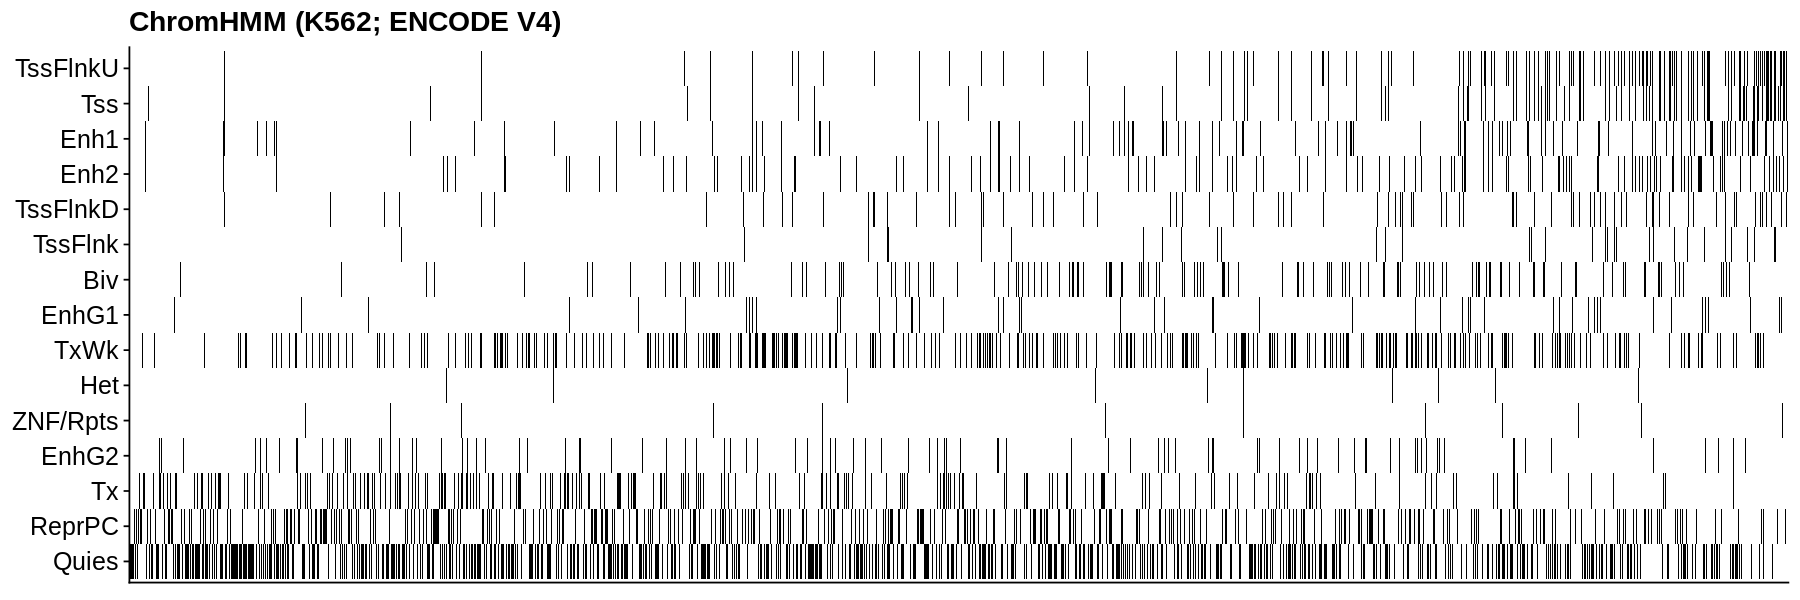

In [95]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "ChromHMM (K562; ENCODE V4)"
dat = dat_annot_chromhmm

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_chromhmm = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

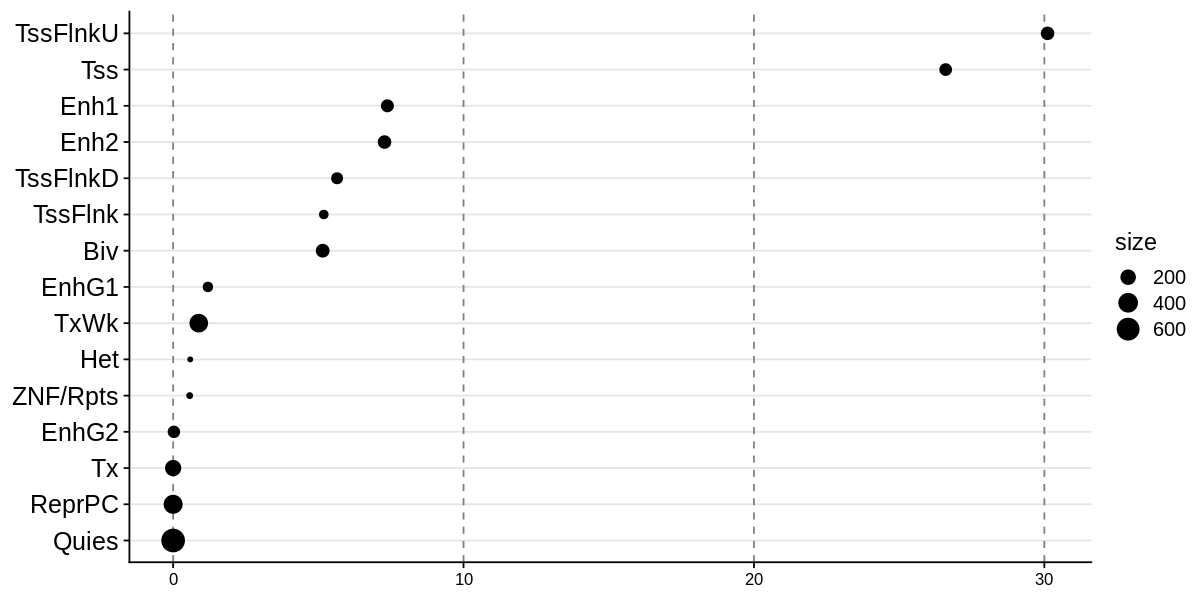

In [116]:
theme_text  = theme(
    axis.text.x  = element_text(size = 10),
    axis.text.y  = element_text(size = 15),
    axis.title   = element_blank()
)
#theme_scale = scale_x_continuous(breaks = c(0, 1, 2, 3, seq(5, 85, by=5)))
theme_grid = theme(
    panel.grid.major.x = element_line(color = "grey50", linewidth = 0.5, linetype = 2),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = 1)
)

dat = dat_enrich_chromhmm
gpt = ggplot(dat, aes(x=nLogP, y=Label, size=size)) +
     geom_point() +
     #theme_scale +
     theme_cowplot() +
     theme_grid +
     theme_text
     
gpt_enrich_chromhmm = gpt
options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

## Import annotation: cCREs

In [96]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.ccre_v4.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_ccre = dat
print(dim(dat))
head(dat)

[1] 277309      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ccre_v4,CA-H3K4me3,2
chr10_100009096_100010466,ccre_v4,Low-DNase,1
chr10_100009096_100010466,ccre_v4,PLS,1
chr10_100009096_100010466,ccre_v4,pELS,1
chr10_100020710_100021134,ccre_v4,Low-DNase,2
chr10_100045961_100046653,ccre_v4,CA-CTCF,1


In [97]:
dat = dat_enrich_total

dat = dat %>% 
    dplyr::filter(Annotation == "ccre_v4")

dat = dat %>% 
    dplyr::arrange(nLogP) %>% 
    dplyr::mutate(Label = factor(Label, levels=Label))

label = dat %>% pull(Label)

dat_enrich_ccre = dat
print(dim(dat))
head(dat)

[1] 8 9


Annotation,Label,pval,padj,log2err,ES,NES,size,nLogP
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ccre_v4,Low-DNase,8.971029e-01,9.054094e-01,0.01545138,0.1620233,0.8444534,1245,0.0431550
ccre_v4,CA-only,4.745255e-01,4.886140e-01,0.04802204,0.3570007,1.0211595,6,0.3110341
ccre_v4,CA-CTCF,1.058941e-01,1.139594e-01,0.13284630,0.2492458,1.2097723,148,0.9432499
ccre_v4,CA-H3K4me3,2.598389e-02,2.954651e-02,0.35248786,0.4601004,1.6982542,20,1.5294939
ccre_v4,CA-TF,7.697156e-03,8.966306e-03,0.40701792,0.2803611,1.3873418,200,2.0473865
ccre_v4,dELS,1.242853e-11,2.598074e-11,0.87532513,0.4378838,2.1359541,164,10.5853485


In [98]:
###
dat = dat_peak_annot_ccre
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat = dat %>% dplyr::mutate(Label=factor(Label, levels=label))

###
dat_annot_ccre = dat
print(dim(dat))
head(dat)

[1] 1722    9
[1] 13776     3


Peak,Label,Value
<fct>,<fct>,<chr>
chrX_48996933_48997220,CA-CTCF,0
chr8_128298518_128298762,CA-CTCF,0
chr8_128242220_128242507,CA-CTCF,0
chr11_34024311_34024546,CA-CTCF,0
chr8_128189792_128190210,CA-CTCF,0
chr20_56703281_56703575,CA-CTCF,0


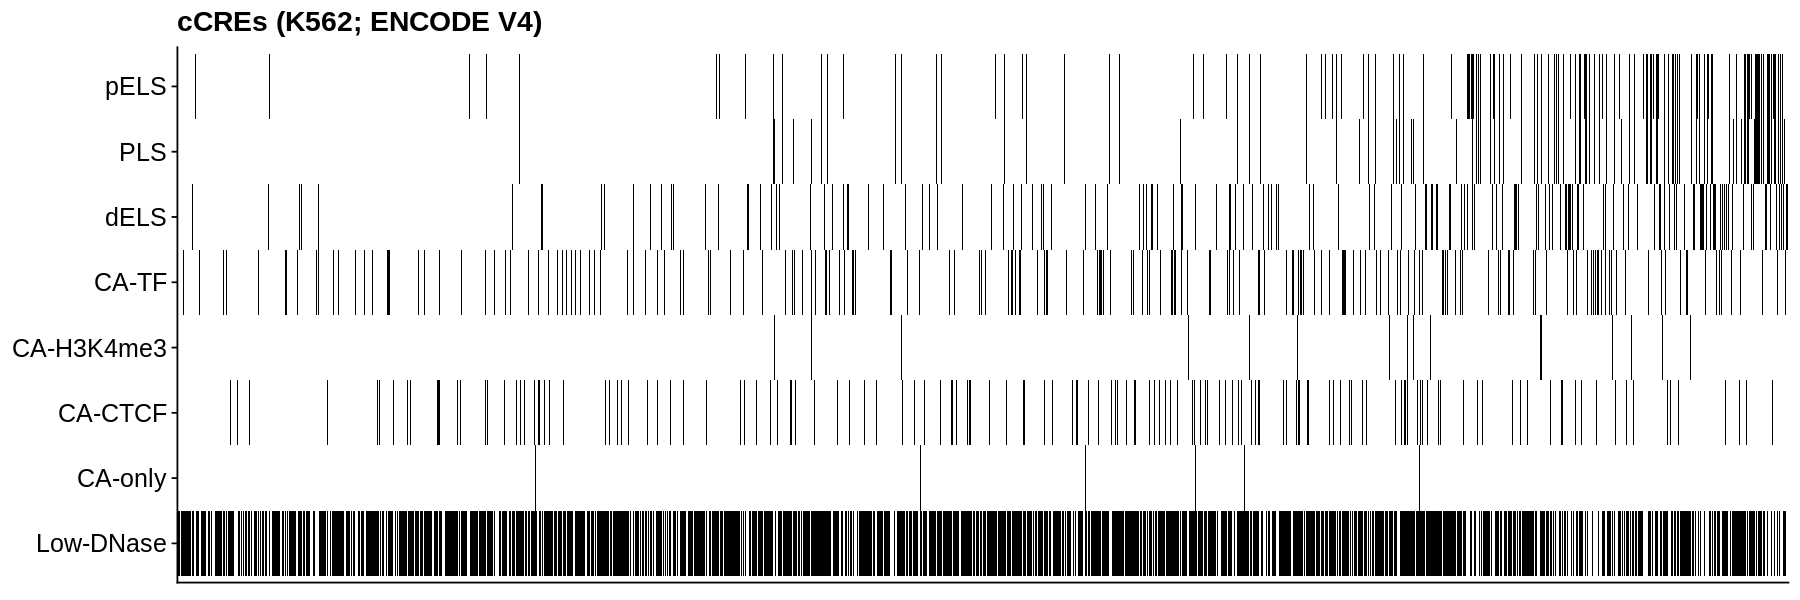

In [99]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

txt = "cCREs (K562; ENCODE V4)"
dat = dat_annot_ccre

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_ccre = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

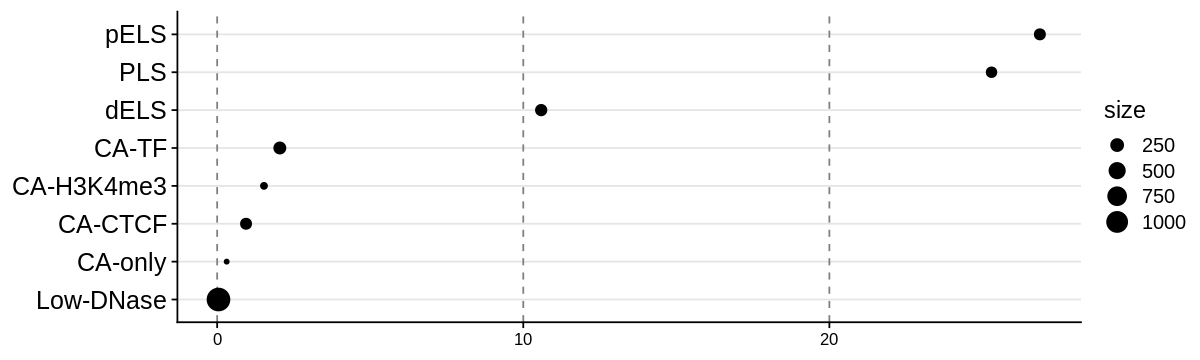

In [113]:
theme_text  = theme(
    axis.text.x  = element_text(size = 10),
    axis.text.y  = element_text(size = 15),
    axis.title   = element_blank()
)
#theme_scale = scale_x_continuous(breaks = c(0, 1, 2, 3, seq(5, 85, by=5)))
theme_grid = theme(
    panel.grid.major.x = element_line(color = "grey50", linewidth = 0.5, linetype = 2),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = 1)
)

dat = dat_enrich_ccre
gpt = ggplot(dat, aes(x=nLogP, y=Label, size=size)) +
     geom_point() +
     #theme_scale +
     theme_cowplot() +
     theme_grid +
     theme_text
     
gpt_enrich_ccre = gpt
options(repr.plot.height=3, repr.plot.width=10)
print(gpt)

## Import annotation: TF subset

In [101]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chipseq_tf_subset.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% tidyr::separate(Label, c("Target", "Accession"), remove = FALSE)

dat_peak_annot_chipseq_tf_subset = dat
print(dim(dat))
head(dat)

[1] 270491      6


Peak,Annotation,Label,Target,Accession,Count
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChIPseq_TF,YY1_ENCFF398UQZ,YY1,ENCFF398UQZ,1
chr10_100185017_100187275,ChIPseq_TF,YY1_ENCFF398UQZ,YY1,ENCFF398UQZ,1
chr10_100228452_100230090,ChIPseq_TF,YY1_ENCFF398UQZ,YY1,ENCFF398UQZ,1
chr10_100267066_100268374,ChIPseq_TF,YY1_ENCFF398UQZ,YY1,ENCFF398UQZ,1
chr10_100285974_100287341,ChIPseq_TF,YY1_ENCFF398UQZ,YY1,ENCFF398UQZ,2
chr10_100346328_100347693,ChIPseq_TF,YY1_ENCFF398UQZ,YY1,ENCFF398UQZ,1


In [102]:
dat = dat_enrich_total

dat = dat %>% 
    dplyr::filter(Label %in% dat_peak_annot_chipseq_tf_subset$Label) %>% 
    tidyr::separate(Label, c("Target", "Accession"), remove = FALSE)

dat = dat %>% 
    dplyr::arrange(nLogP) %>% 
    dplyr::mutate(Label  = factor(Label,  levels=Label)) %>%
    dplyr::mutate(Target = factor(Target, levels=unique(Target)))

label = dat %>% pull(Label)

dat_enrich_tf_subset = dat
print(dim(dat))
head(dat)

[1] 16 11


Annotation,Label,Target,Accession,pval,padj,log2err,ES,NES,size,nLogP
<chr>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ChIPseq_TF,KLF10_ENCFF142ZTD,KLF10,ENCFF142ZTD,7.473341e-03,8.745642e-03,0.4070179,0.6597818,1.941731,7,2.058208
ChIPseq_TF,GATA1_ENCFF657CTC,GATA1,ENCFF657CTC,9.407489e-11,1.840491e-10,0.8390889,0.5081333,2.362937,91,9.735066
ChIPseq_TF,CTCF_ENCFF660GHM,CTCF,ENCFF660GHM,5.313089e-11,1.055700e-10,0.8513391,0.3905116,1.979590,271,9.976460
ChIPseq_TF,NFE2_ENCFF023IFO,NFE2,ENCFF023IFO,8.224905e-12,1.738394e-11,0.8753251,0.5014436,2.357117,102,10.759852
ChIPseq_TF,ELK1_ENCFF715WGN,ELK1,ENCFF715WGN,4.331204e-12,9.335335e-12,0.8870750,0.7584162,2.907405,25,11.029870
ChIPseq_TF,KLF16_ENCFF488OTN,KLF16,ENCFF488OTN,8.560647e-18,2.687973e-17,1.0864405,0.5360293,2.563243,126,16.570575


In [103]:
###
dat = dat_peak_annot_chipseq_tf_subset
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS)) %>% 
    tidyr::separate(Label, c("Target", "Accession"), remove = FALSE)

###
dat = dat %>% 
    dplyr::mutate(Label=factor(Label, levels=label)) %>%
    dplyr::arrange(Label) %>%
    dplyr::mutate(Target=factor(Target, levels=unique(Target)))

###
dat_annot_chipseq_tf_subset = dat
print(dim(dat))
head(dat)

[1] 1722   17
[1] 27552     5


Peak,Label,Target,Accession,Value
<fct>,<fct>,<fct>,<chr>,<chr>
chrX_48996933_48997220,KLF10_ENCFF142ZTD,KLF10,ENCFF142ZTD,0
chr8_128298518_128298762,KLF10_ENCFF142ZTD,KLF10,ENCFF142ZTD,0
chr8_128242220_128242507,KLF10_ENCFF142ZTD,KLF10,ENCFF142ZTD,0
chr11_34024311_34024546,KLF10_ENCFF142ZTD,KLF10,ENCFF142ZTD,0
chr8_128189792_128190210,KLF10_ENCFF142ZTD,KLF10,ENCFF142ZTD,0
chr20_56703281_56703575,KLF10_ENCFF142ZTD,KLF10,ENCFF142ZTD,0


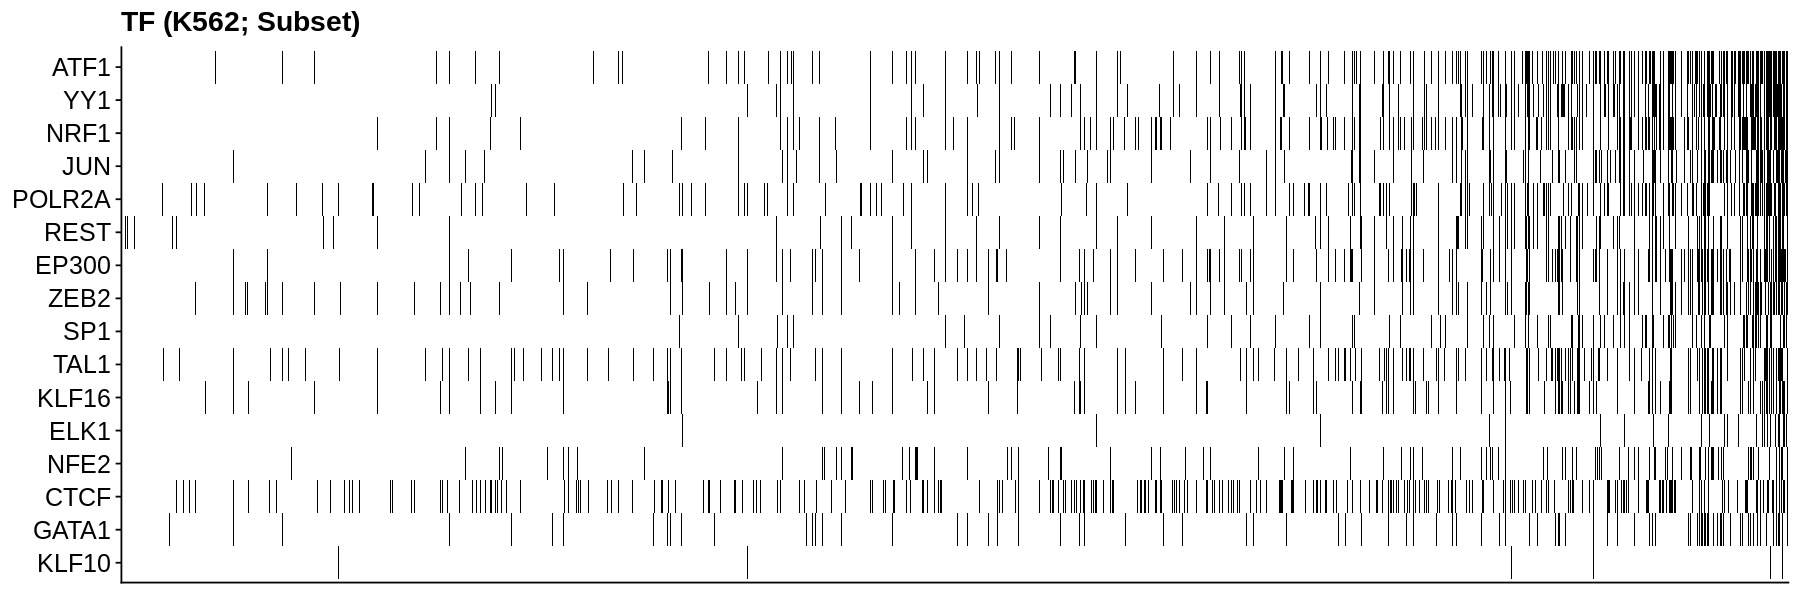

In [104]:
theme_fill = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")
#theme_legend = theme(
#    legend.position = "bottom", 
#    legend.key.size = unit(1, 'cm'),
#    legend.title = element_text(size=20),
#    legend.text = element_text(size=10))

txt = "TF (K562; Subset)"
dat = dat_annot_chipseq_tf_subset

gpt = ggplot(dat, aes(x=Peak, y=Target, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_chipseq_tf_subset = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

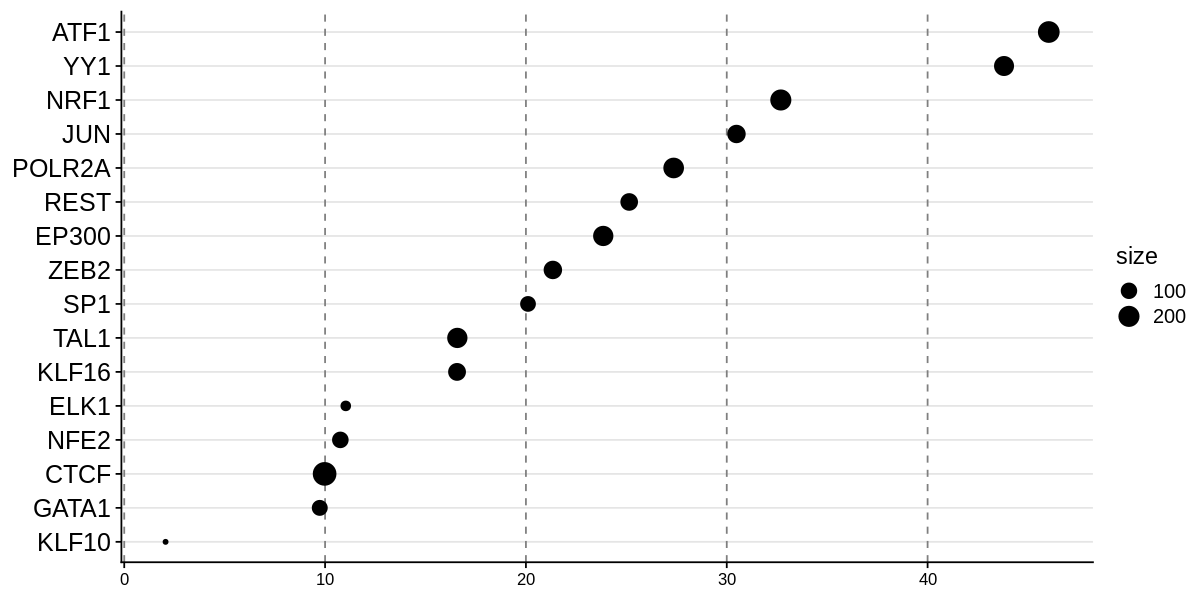

In [105]:
theme_text  = theme(
    axis.text.x  = element_text(size = 10),
    axis.text.y  = element_text(size = 15),
    axis.title   = element_blank()
)
#theme_scale = scale_x_continuous(breaks = c(0, 1, 2, 3, seq(5, 85, by=5)))
theme_grid = theme(
    panel.grid.major.x = element_line(color = "grey50", linewidth = 0.5, linetype = 2),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = 1)
)

dat = dat_enrich_tf_subset
gpt = ggplot(dat, aes(x=nLogP, y=Target, size=size)) +
     geom_point() +
     #theme_scale +
     theme_cowplot() +
     theme_grid +
     theme_text
     
gpt_enrich_chipseq_tf_subset = gpt
options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

## Import annotation: TF

In [133]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.chipseq_tf.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_chipseq_tf = dat
print(dim(dat))
head(dat)

[1] 5716412       4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100045961_100046653,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100228452_100230090,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100240591_100241246,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100338359_100339077,ChIPseq_TF,CTCF_ENCFF769AUF,1
chr10_100342247_100342824,ChIPseq_TF,CTCF_ENCFF769AUF,1


In [134]:
dat = dat_enrich_total

dat = dat %>% 
    dplyr::filter(Label %in% dat_peak_annot_chipseq_tf$Label)

dat = dat %>% 
    dplyr::arrange(nLogP) %>% 
    dplyr::mutate(Label = factor(Label, levels=Label))

label = dat %>% pull(Label)

dat_enrich_chipseq_tf = dat
print(dim(dat))
head(dat)

[1] 713   9


Annotation,Label,pval,padj,log2err,ES,NES,size,nLogP
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ChIPseq_TF,POLR2AphosphoS2_ENCFF950YZE,0.8611389,0.8702635,0.01832085,0.1822819,0.6447170,16,0.06034923
ChIPseq_TF,CBX2_ENCFF258XBJ,0.8001998,0.8097513,0.02279818,0.2396742,0.5852503,3,0.09164837
ChIPseq_TF,CBX8_ENCFF522HZT,0.8001998,0.8097513,0.02279818,0.2396742,0.5852503,3,0.09164837
ChIPseq_TF,RNF2_ENCFF923GDR,0.7972028,0.8088640,0.02301169,0.2470930,0.5507129,2,0.09212449
ChIPseq_TF,ZNF507_ENCFF072JDK,0.7972028,0.8088640,0.02301169,0.2097618,0.4165023,1,0.09212449
ChIPseq_TF,CREBBP_ENCFF532VPN,0.6913087,0.7042303,0.03048941,0.3137711,0.6230228,1,0.15228526


In [135]:
###
dat = dat_peak_annot_chipseq_tf
lst = split(dat, dat$Label)
lst_annot = lst

###
dat = dat_peak_score_starrmpra_crispr
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}
print(dim(dat))

###
dat = dat %>% 
    tidyr::gather(Label, Value, -Peak) %>%
    dplyr::mutate(Peak  = factor(Peak,  levels=PEAKS))

###
dat = dat %>% dplyr::mutate(Label=factor(Label, levels=label))

###
dat_annot_chipseq_tf = dat
print(dim(dat))
head(dat)

[1] 1722  734
[1] 1262226       3


Peak,Label,Value
<fct>,<fct>,<chr>
chrX_48996933_48997220,ADNP_ENCFF739AJO,0
chr8_128298518_128298762,ADNP_ENCFF739AJO,0
chr8_128242220_128242507,ADNP_ENCFF739AJO,0
chr11_34024311_34024546,ADNP_ENCFF739AJO,0
chr8_128189792_128190210,ADNP_ENCFF739AJO,0
chr20_56703281_56703575,ADNP_ENCFF739AJO,0


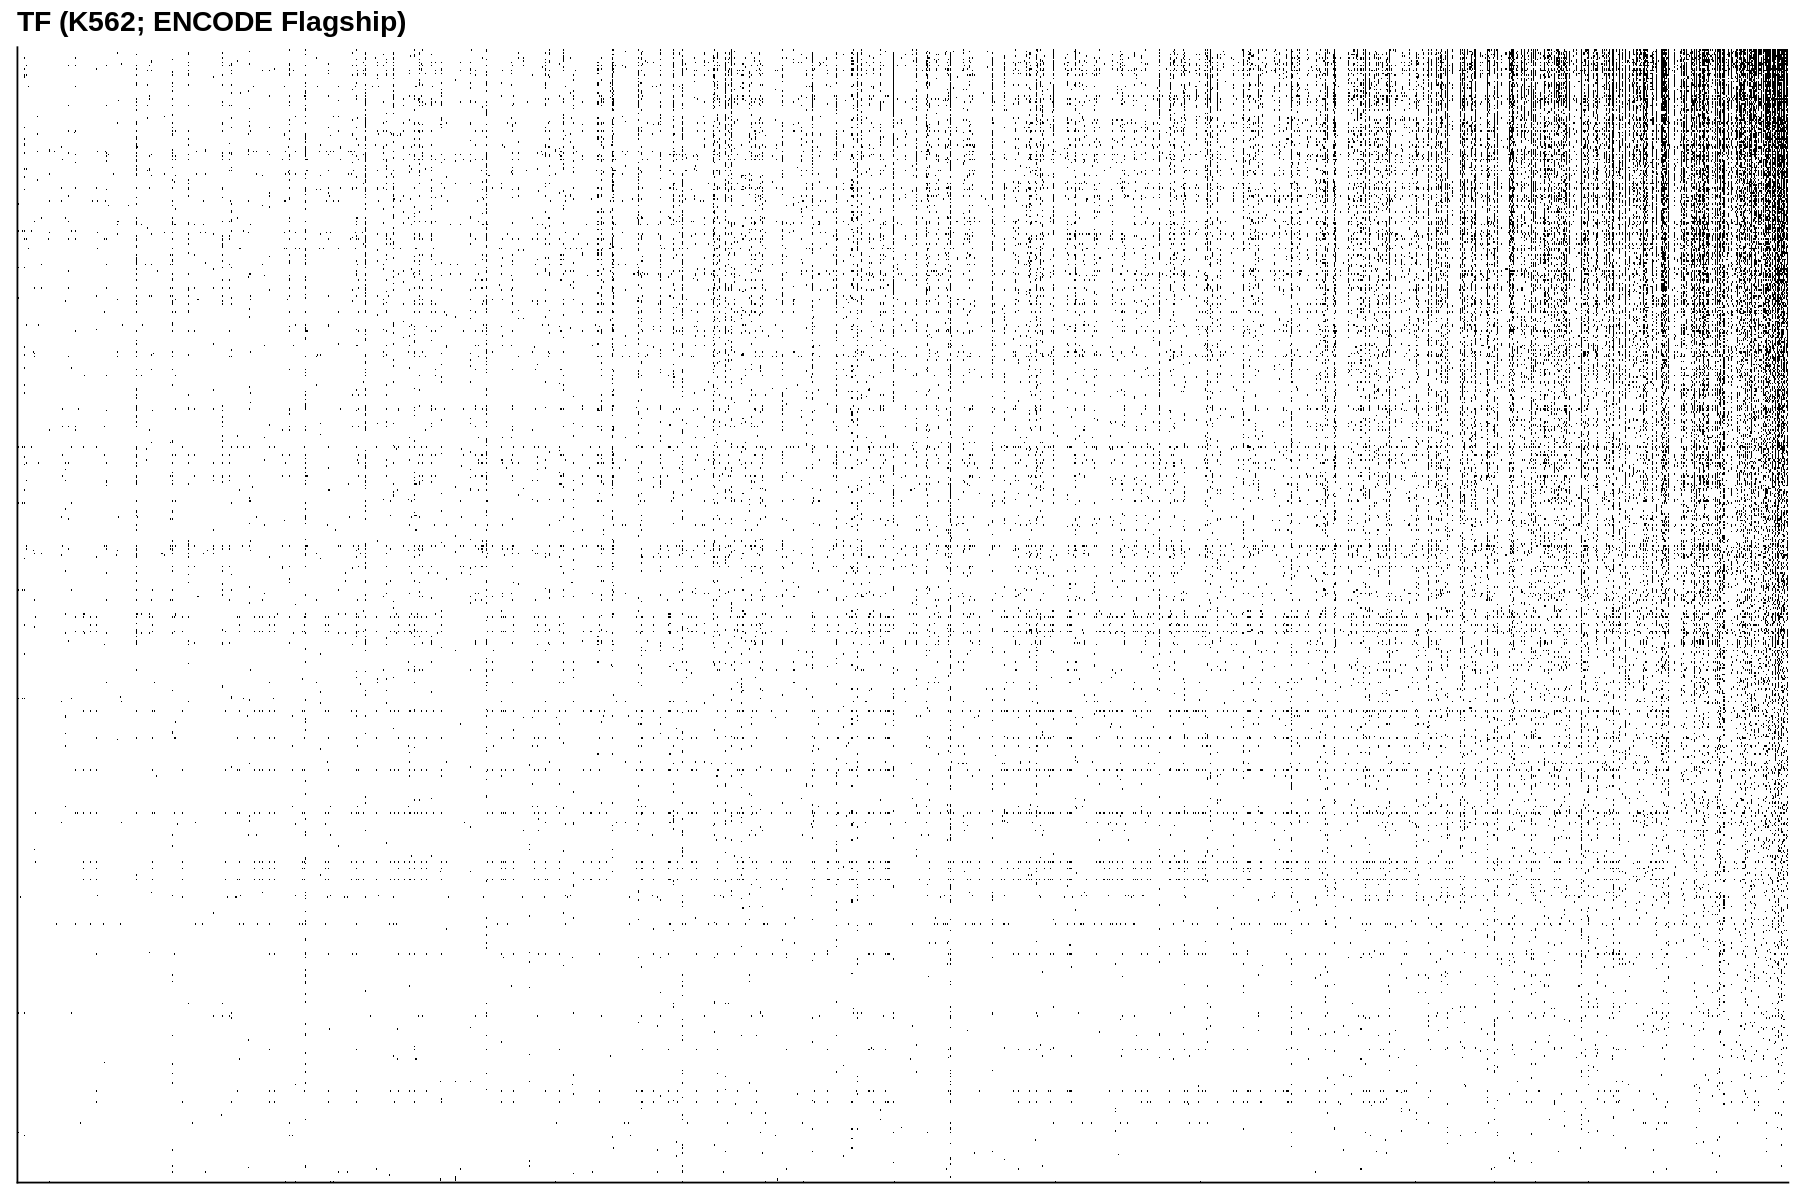

In [136]:
theme_fill = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "bold", size = 17)
)
theme_legend = theme(legend.position = "none")

txt = "TF (K562; ENCODE Flagship)"
dat = dat_annot_chipseq_tf

gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
    geom_tile() +
    labs(title = txt) +
    theme_cowplot() +
    theme_fill +
    theme_text +
    theme_legend

gpt_annot_chipseq_tf = gpt
options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

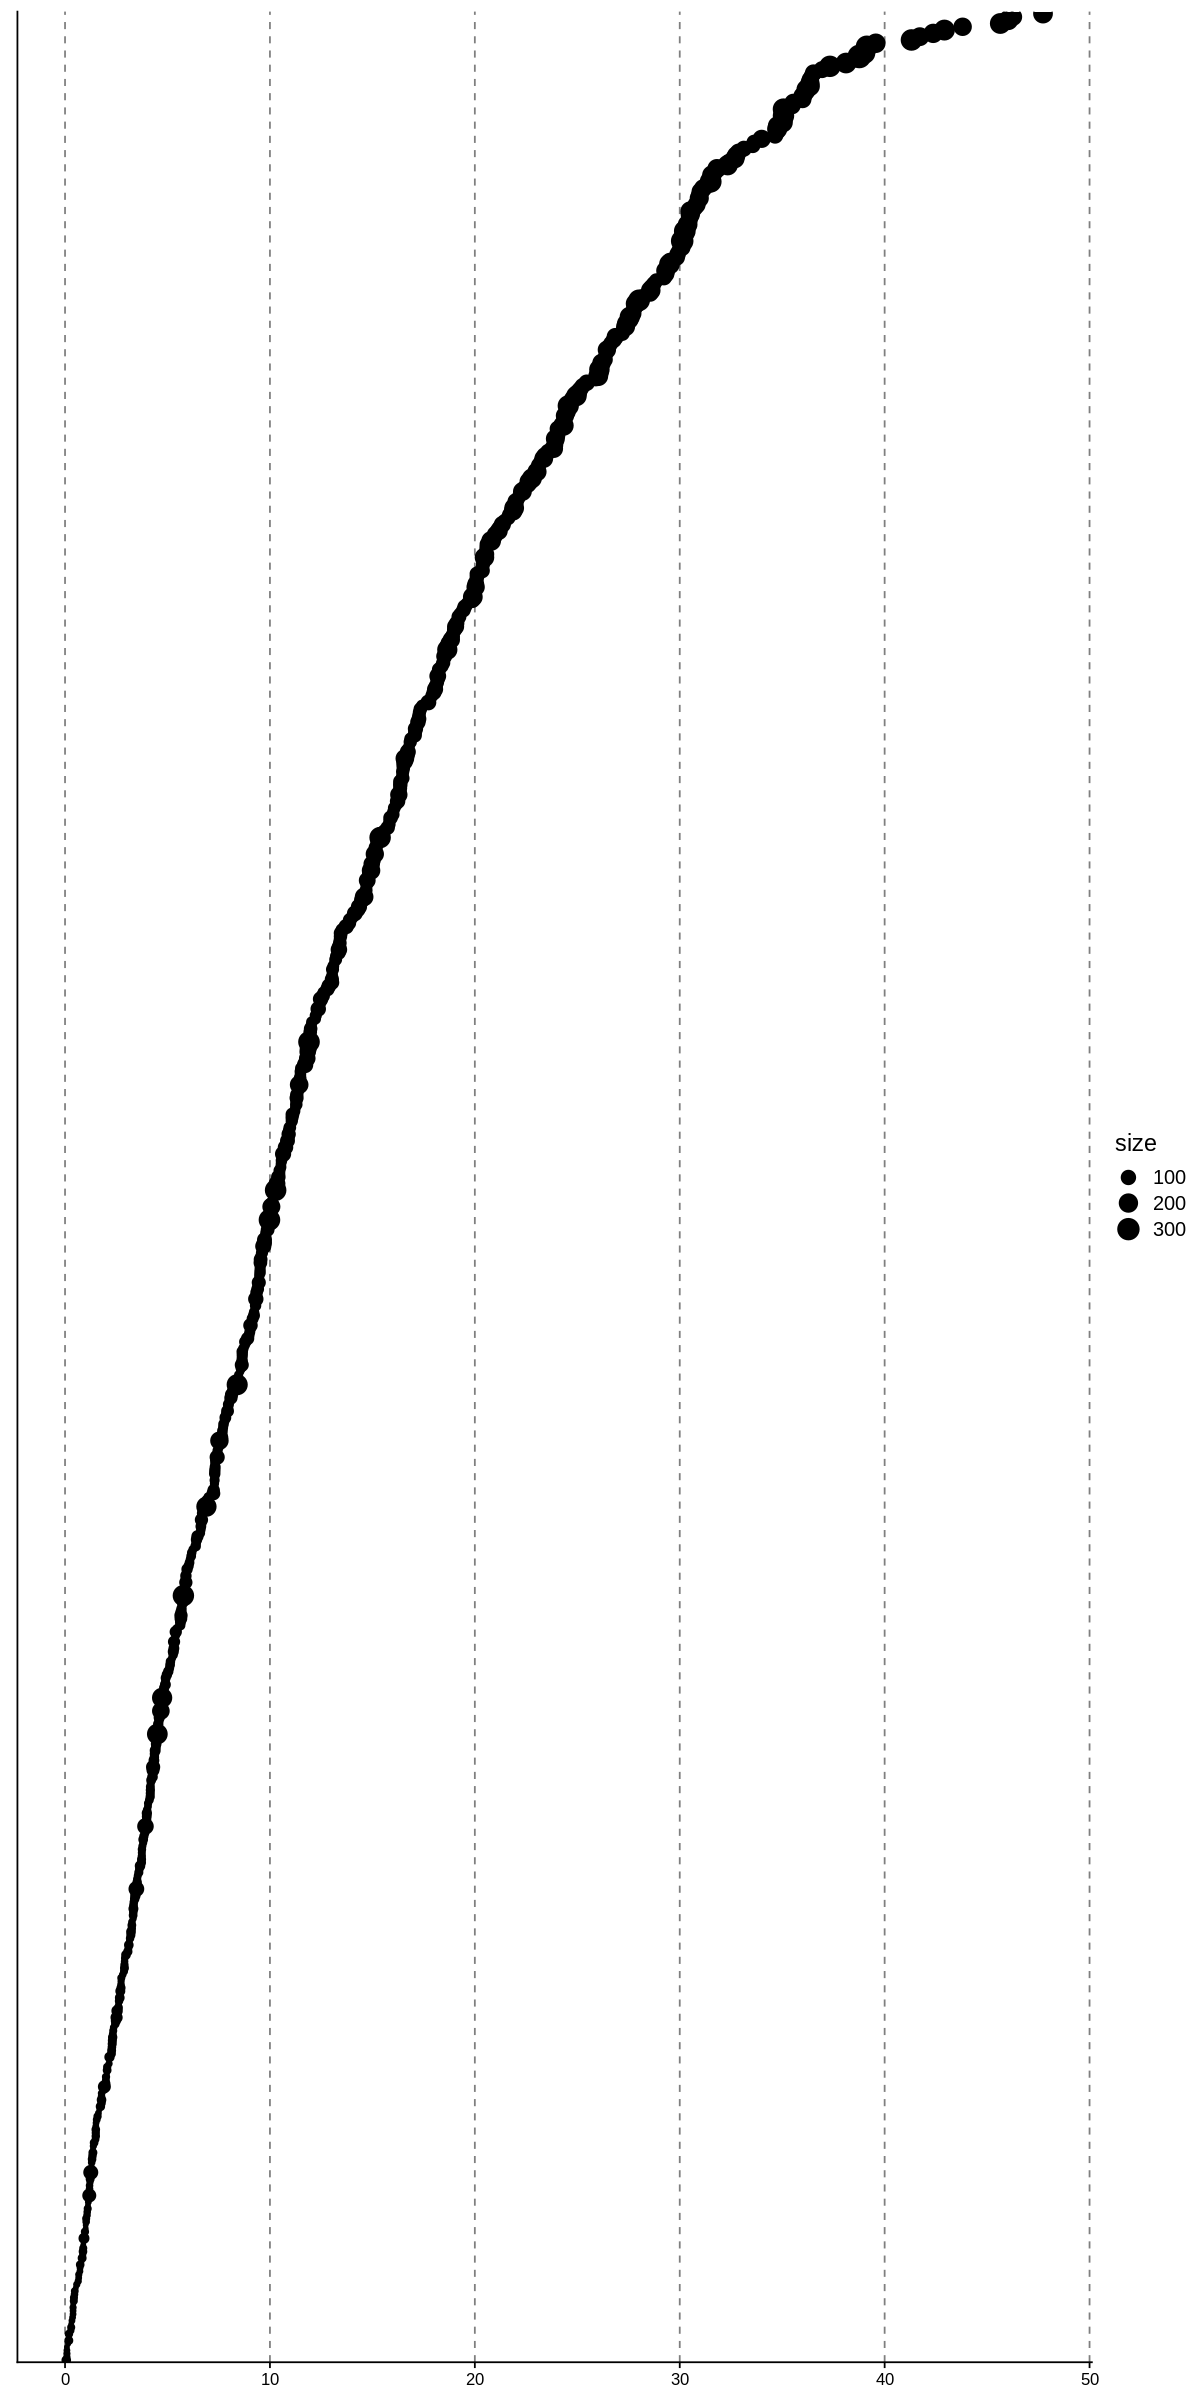

In [150]:
theme_text  = theme(
    axis.text.x  = element_text(size = 10),
    axis.text.y  = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title   = element_blank()
)
#theme_scale = scale_x_continuous(breaks = c(0, 1, 2, 3, seq(5, 85, by=5)))
theme_grid = theme(
    panel.grid.major.x = element_line(color = "grey50", linewidth = 0.5, linetype = 2),
    #panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = 1)
)

dat = dat_enrich_chipseq_tf
gpt = ggplot(dat, aes(x=nLogP, y=Label, size=size)) +
     geom_point() +
     #theme_scale +
     theme_cowplot() +
     theme_grid +
     theme_text
     
gpt_enrich_chipseq_tf = gpt
options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

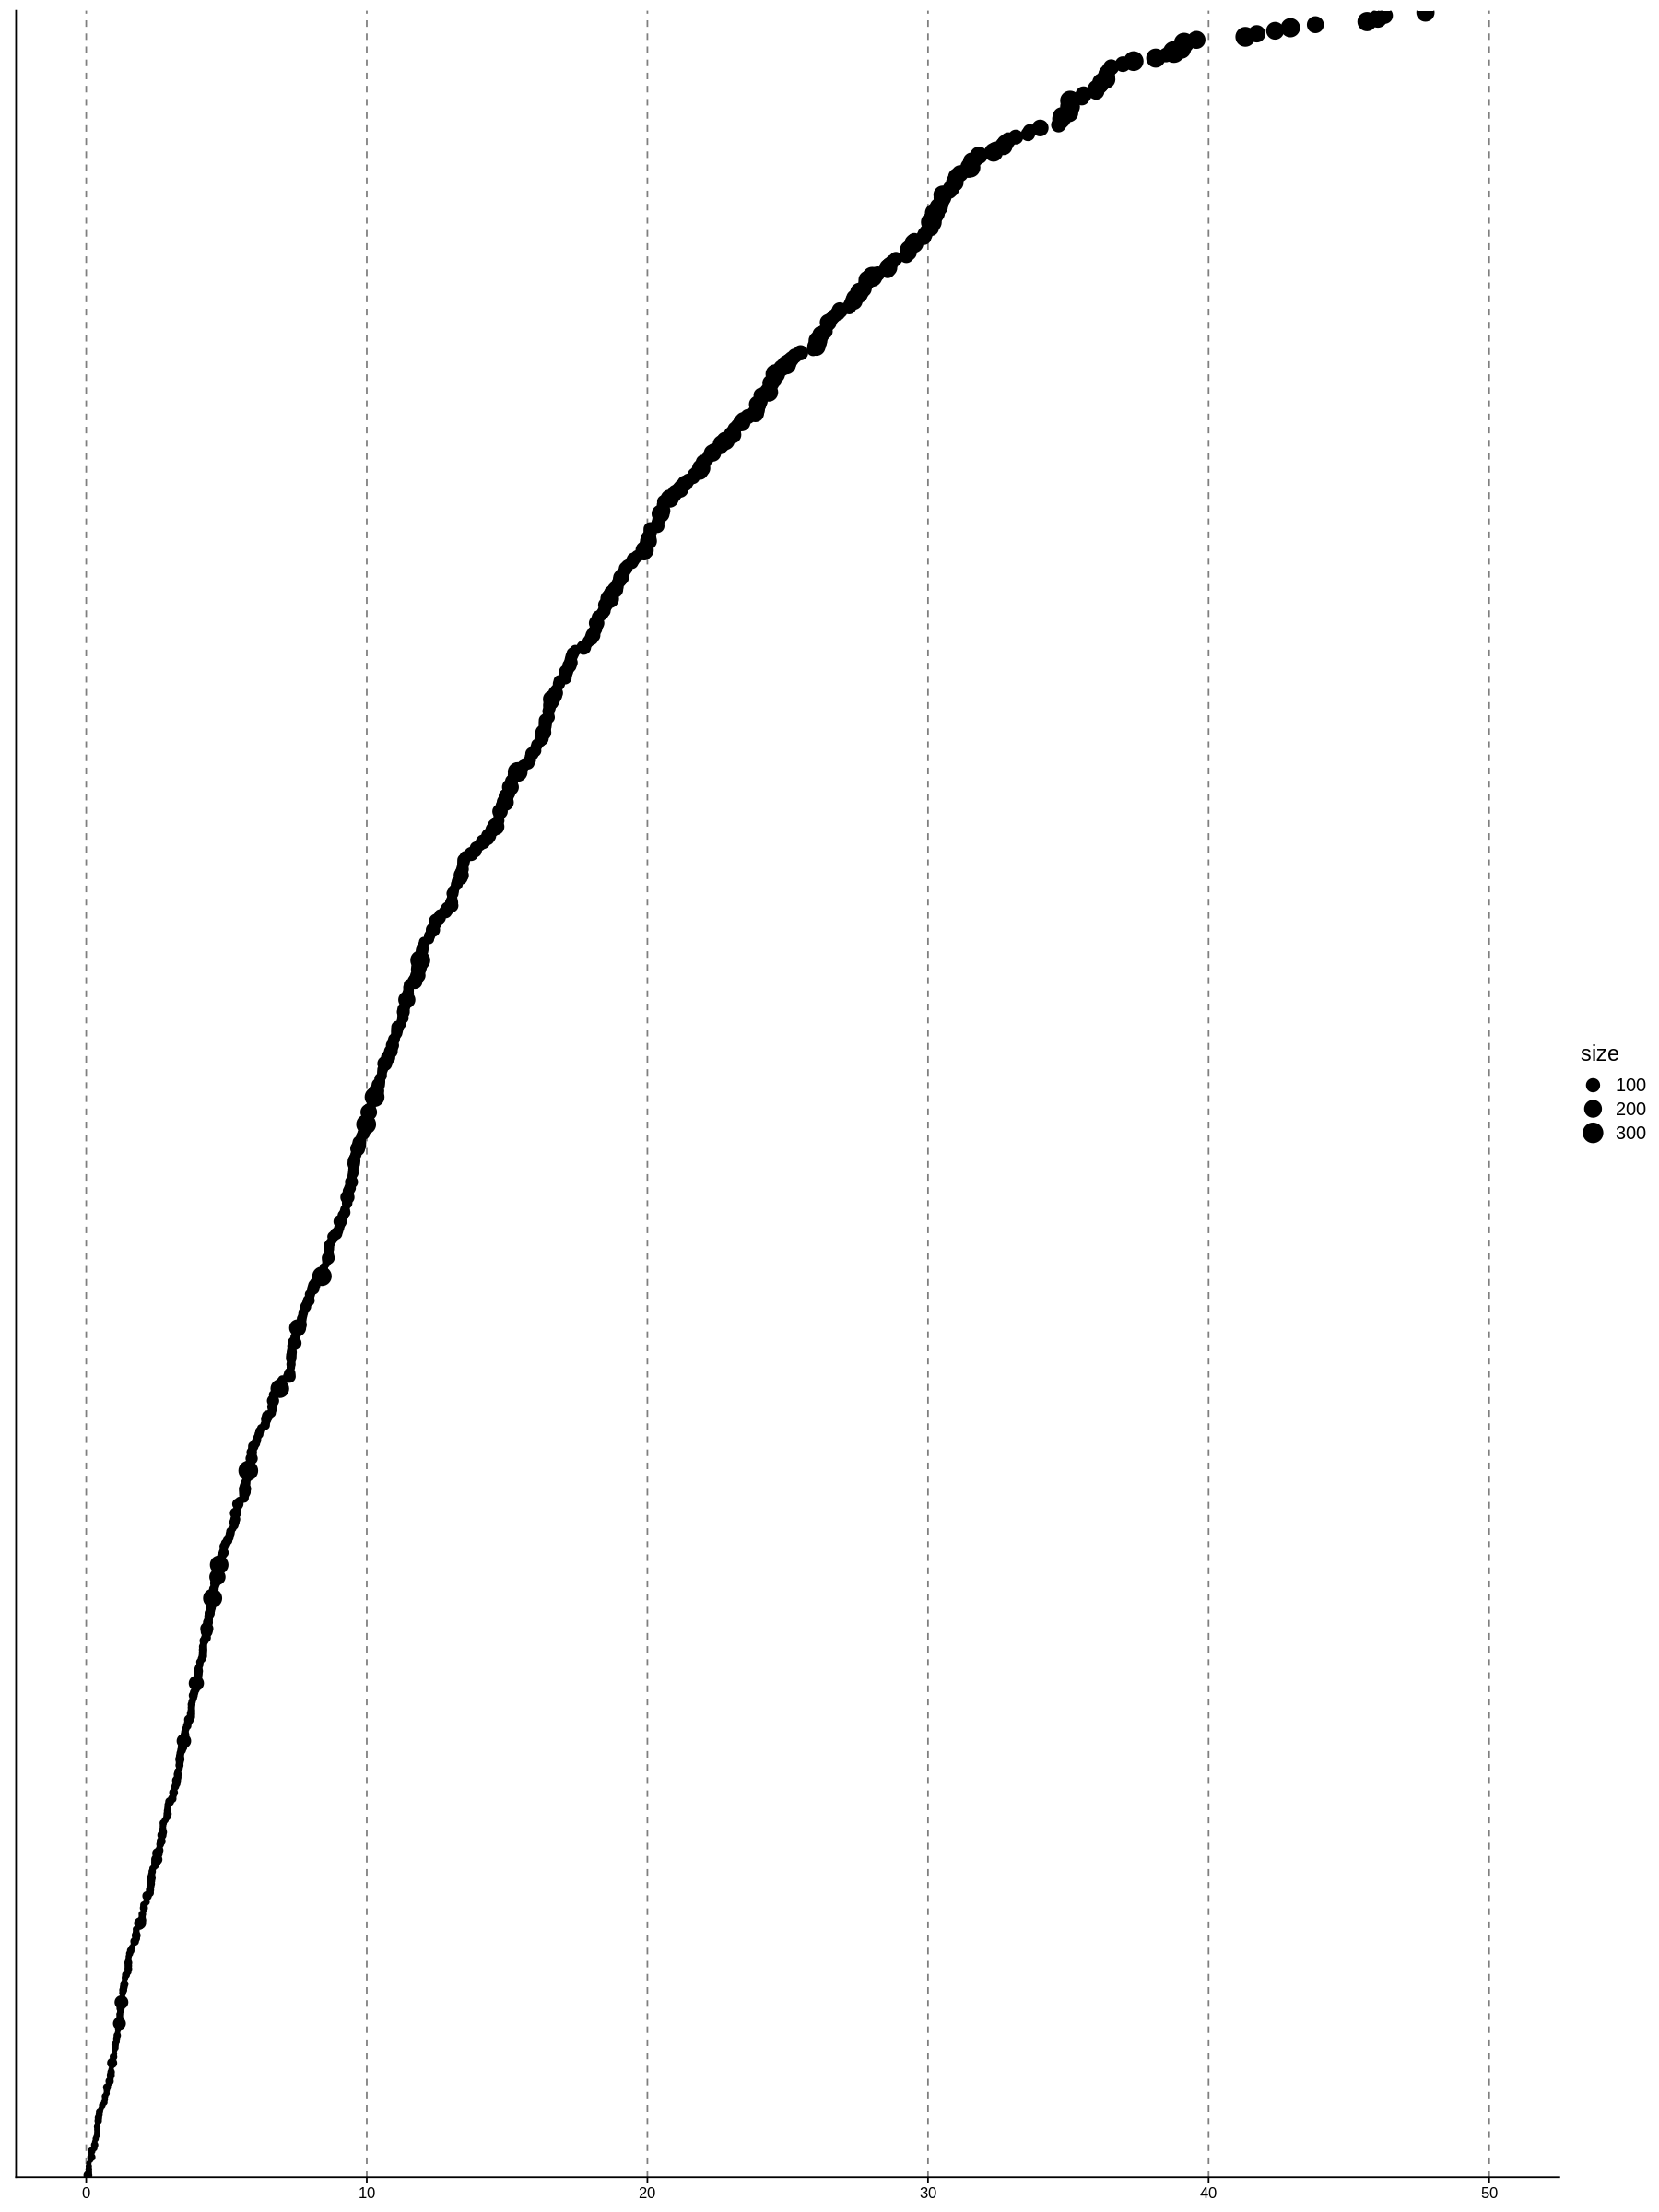

In [151]:
options(repr.plot.height=20, repr.plot.width=15)
gpt_enrich_chipseq_tf + xlim(0, 50)

## Final plot

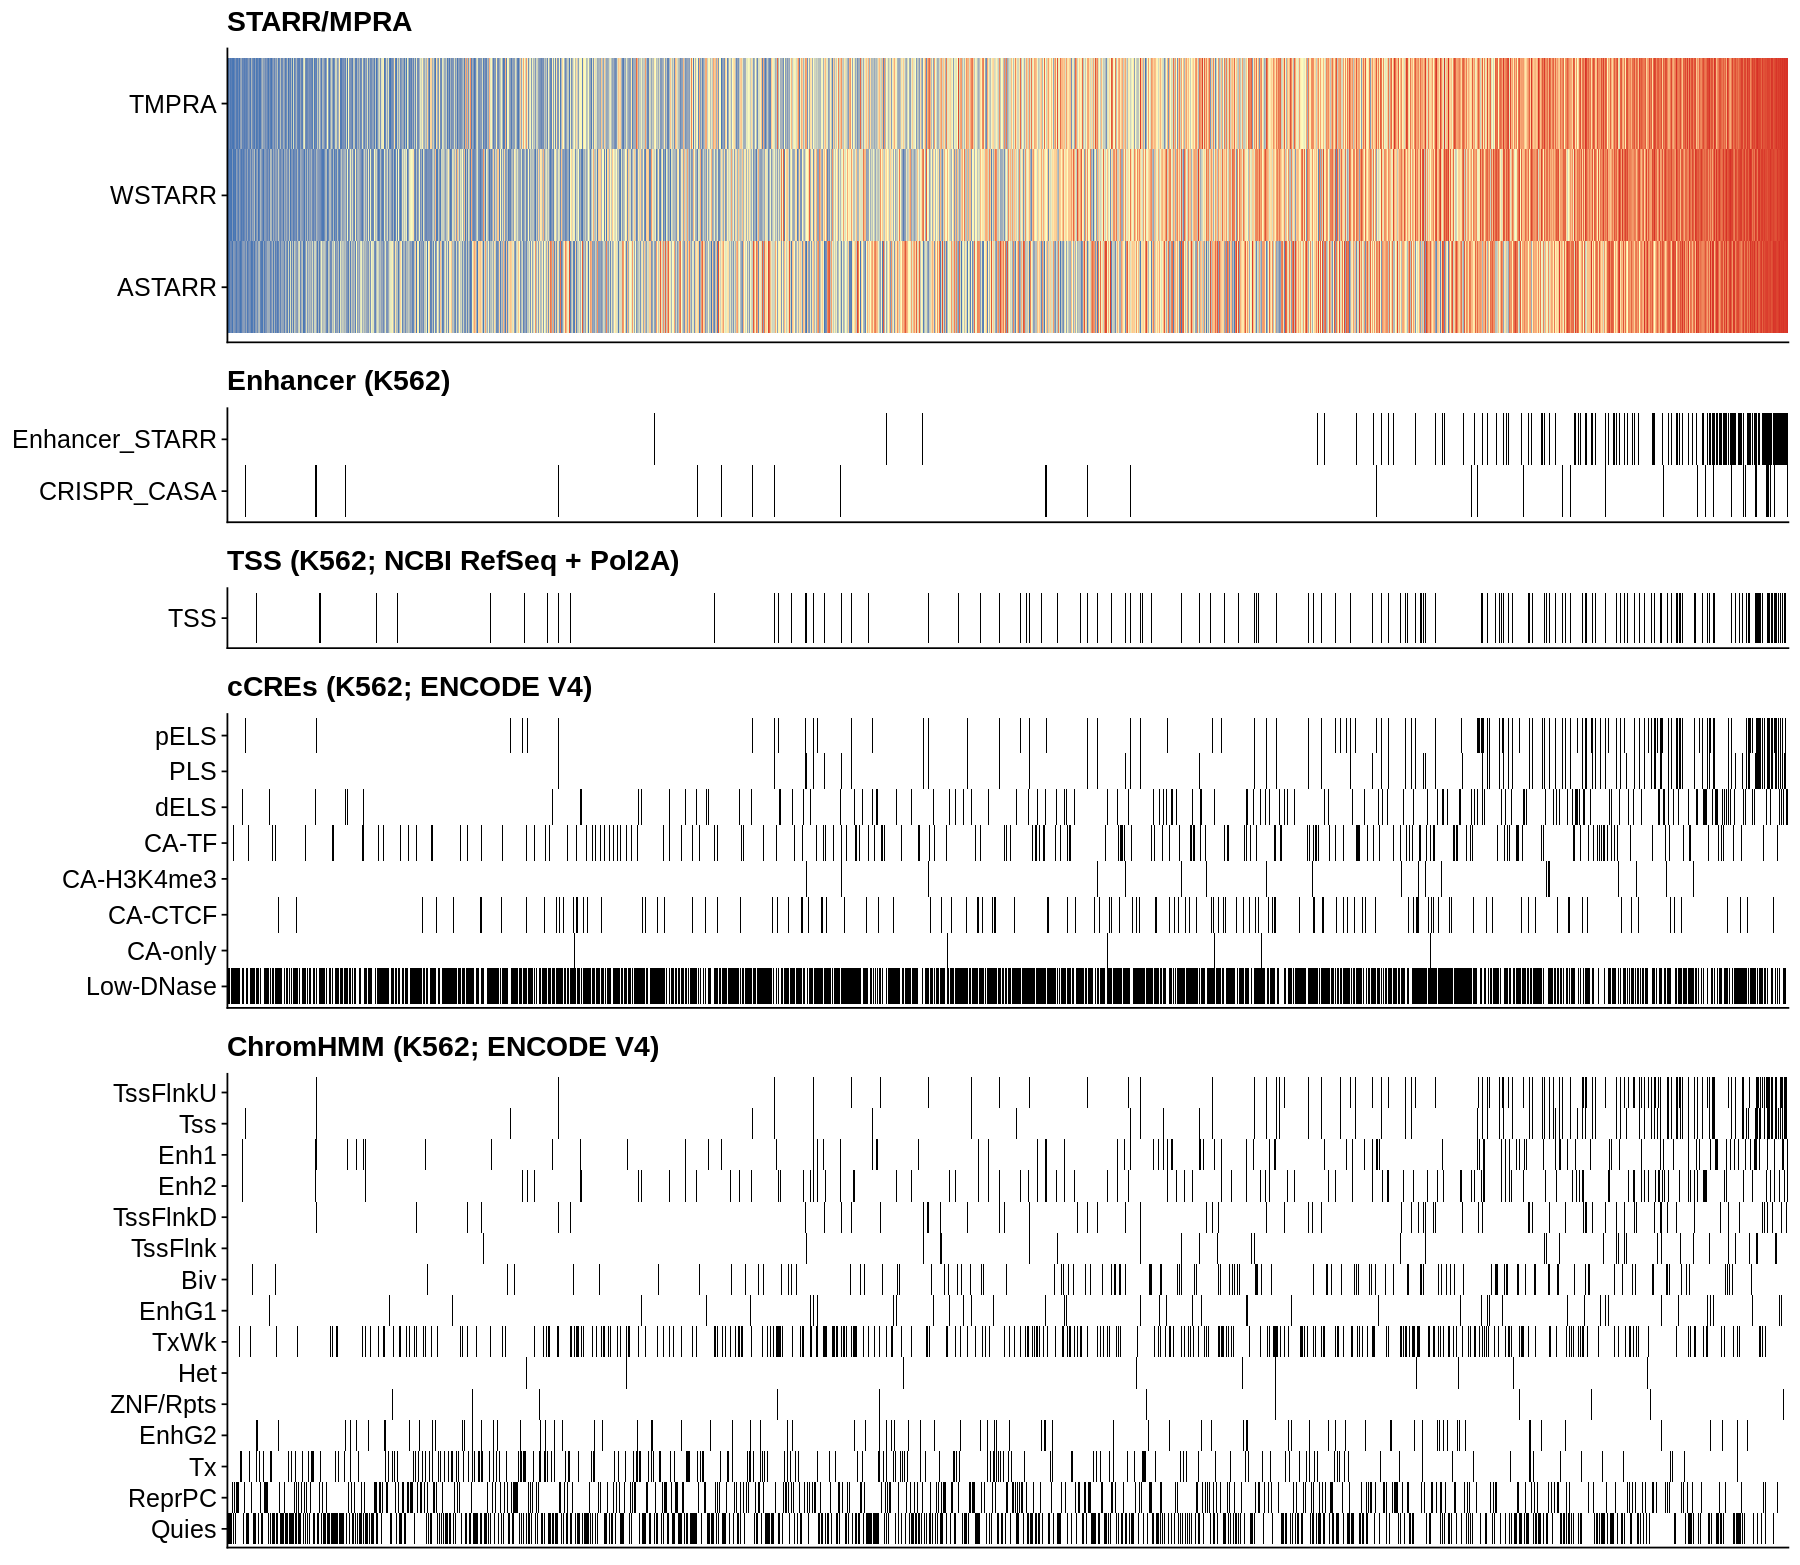

In [106]:
rel_heights = c(2, 1, 0.7, 2, 3)
lst_gpt = list(
    gpt_score_starrmpra,
    gpt_annot_enhancer,
    gpt_annot_tss_pol2,
    gpt_annot_ccre,
    gpt_annot_chromhmm
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)

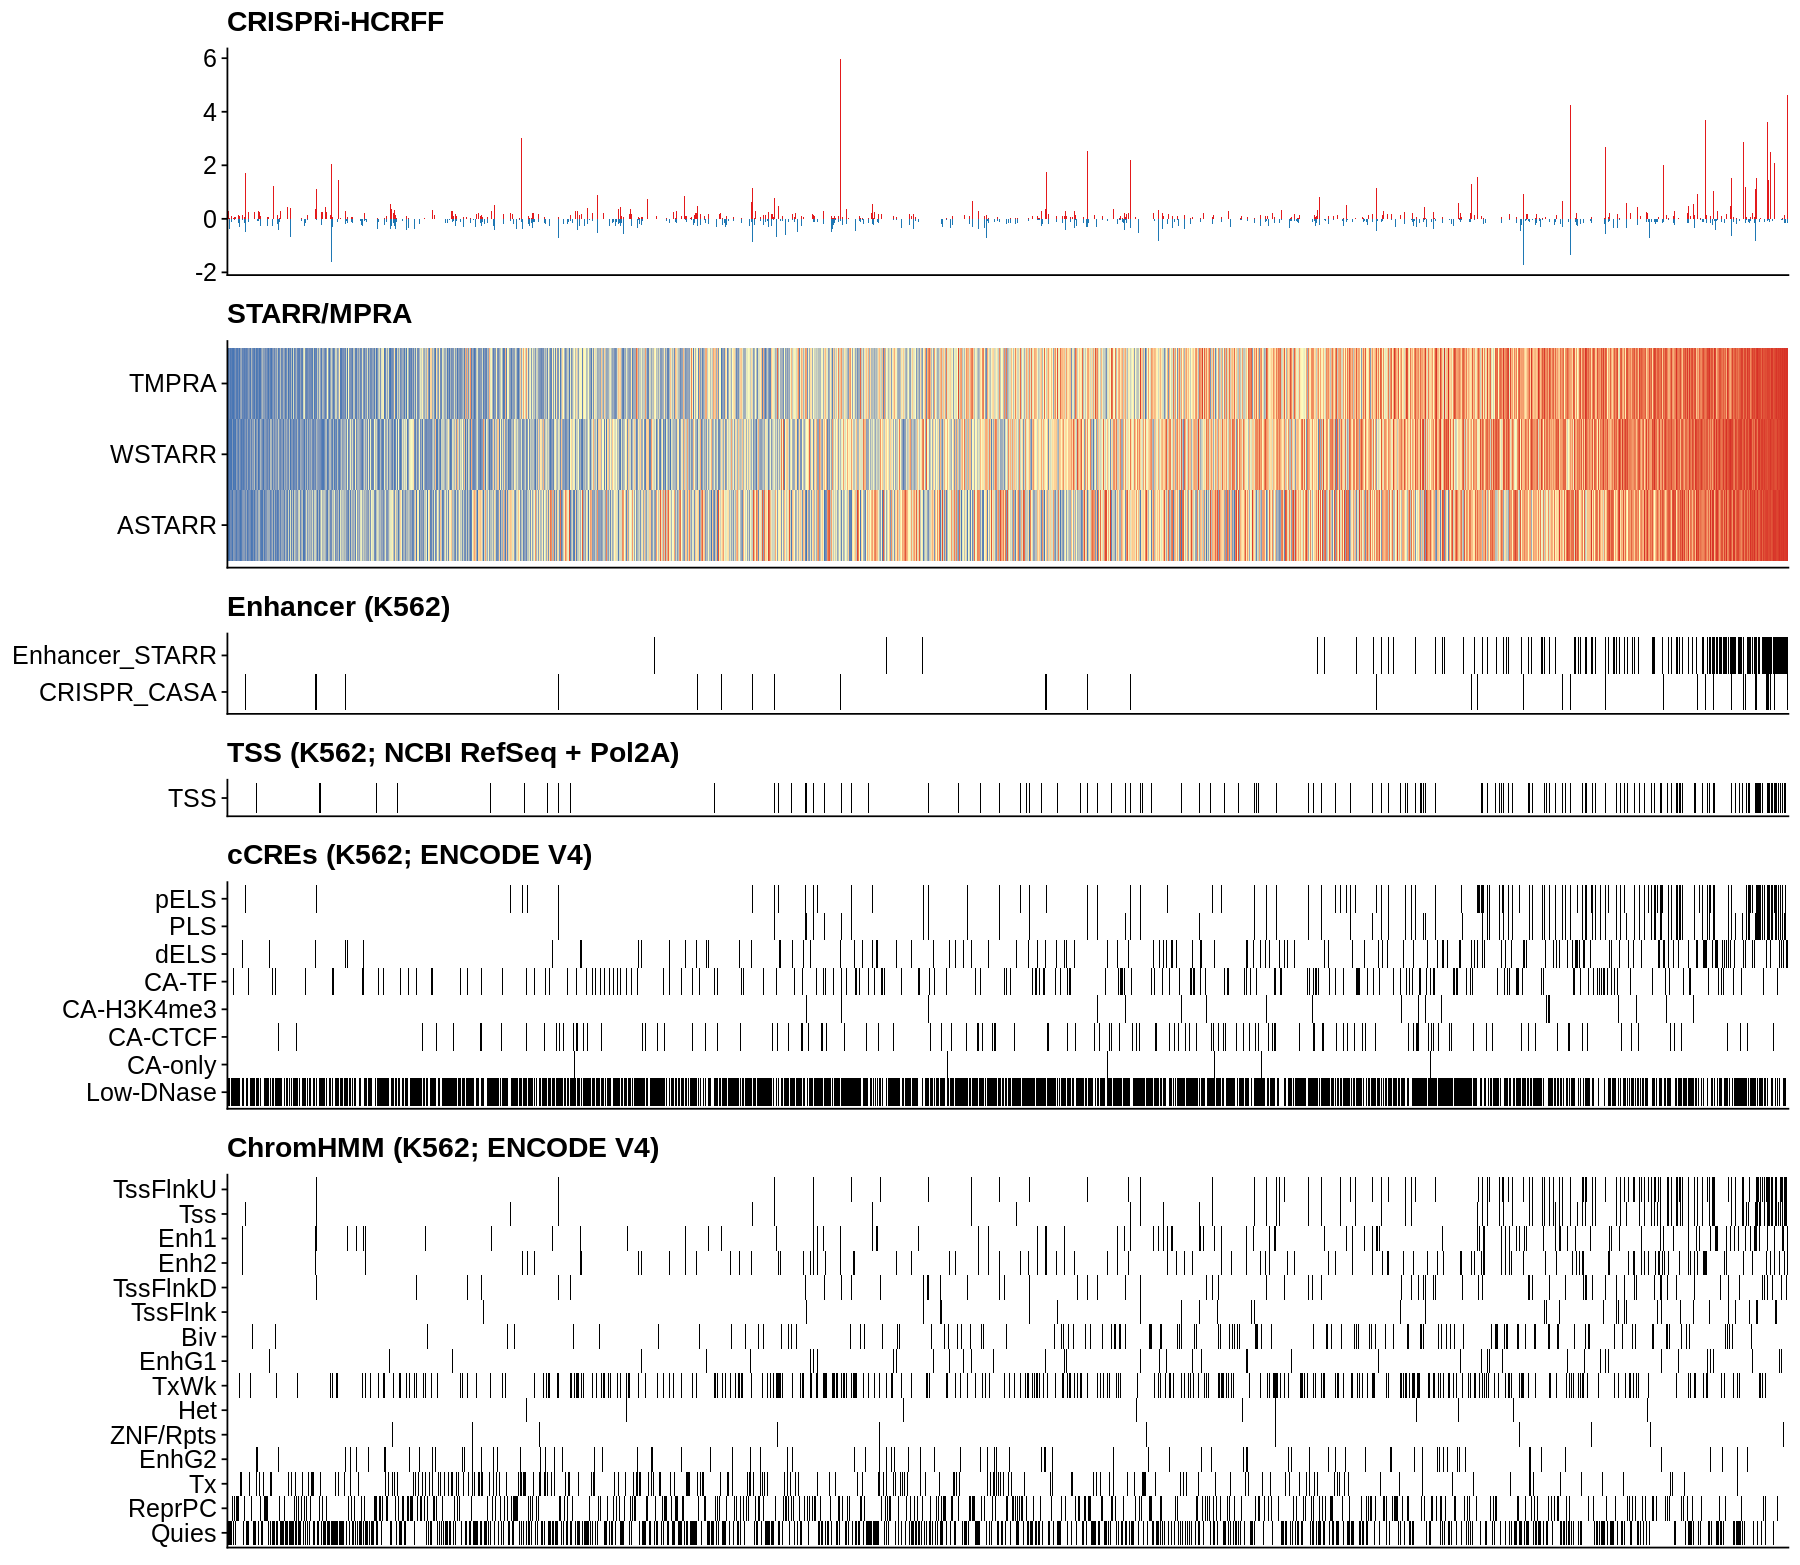

In [107]:
rel_heights_add_crispr = c(rel_heights[1], rel_heights)
lst_gpt_add_crispr = append(list(gpt_score_crispr), lst_gpt)

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt_add_crispr,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights_add_crispr)

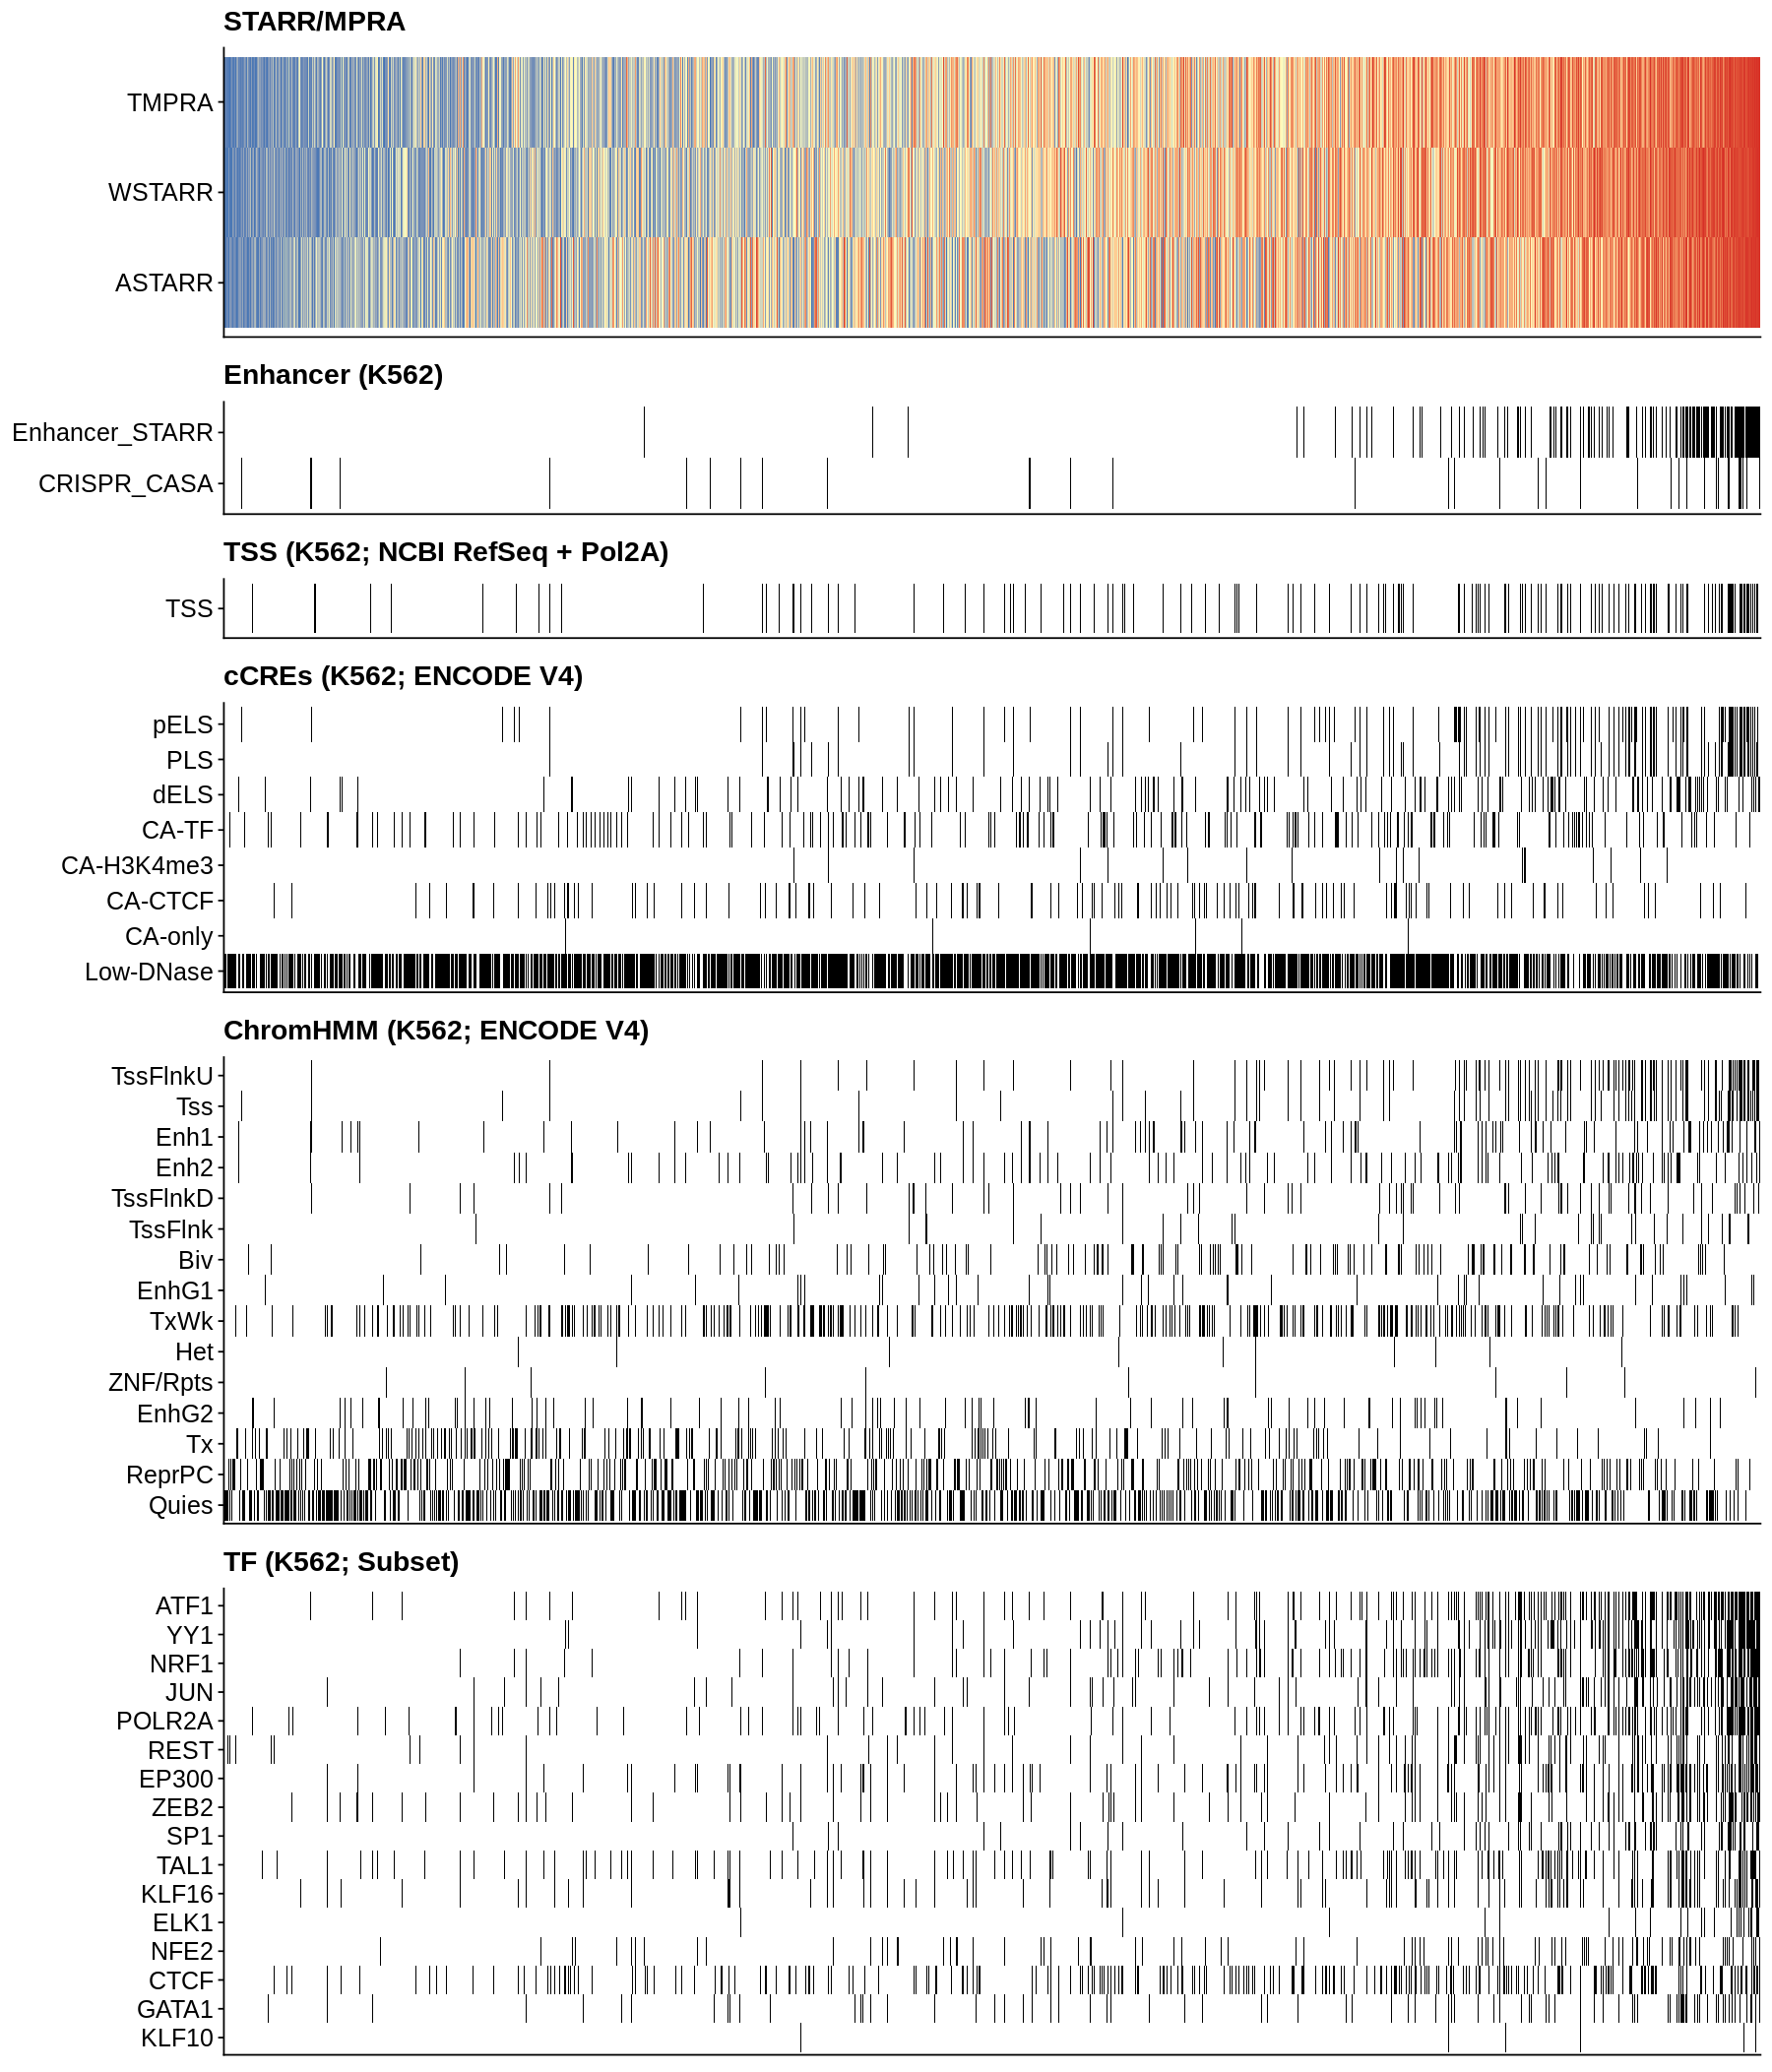

In [110]:
rel_heights = c(2, 1, 0.7, 2, 3, 3)
lst_gpt = list(
    gpt_score_starrmpra,
    gpt_annot_enhancer,
    gpt_annot_tss_pol2,
    gpt_annot_ccre,
    gpt_annot_chromhmm,
    gpt_annot_chipseq_tf_subset
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)

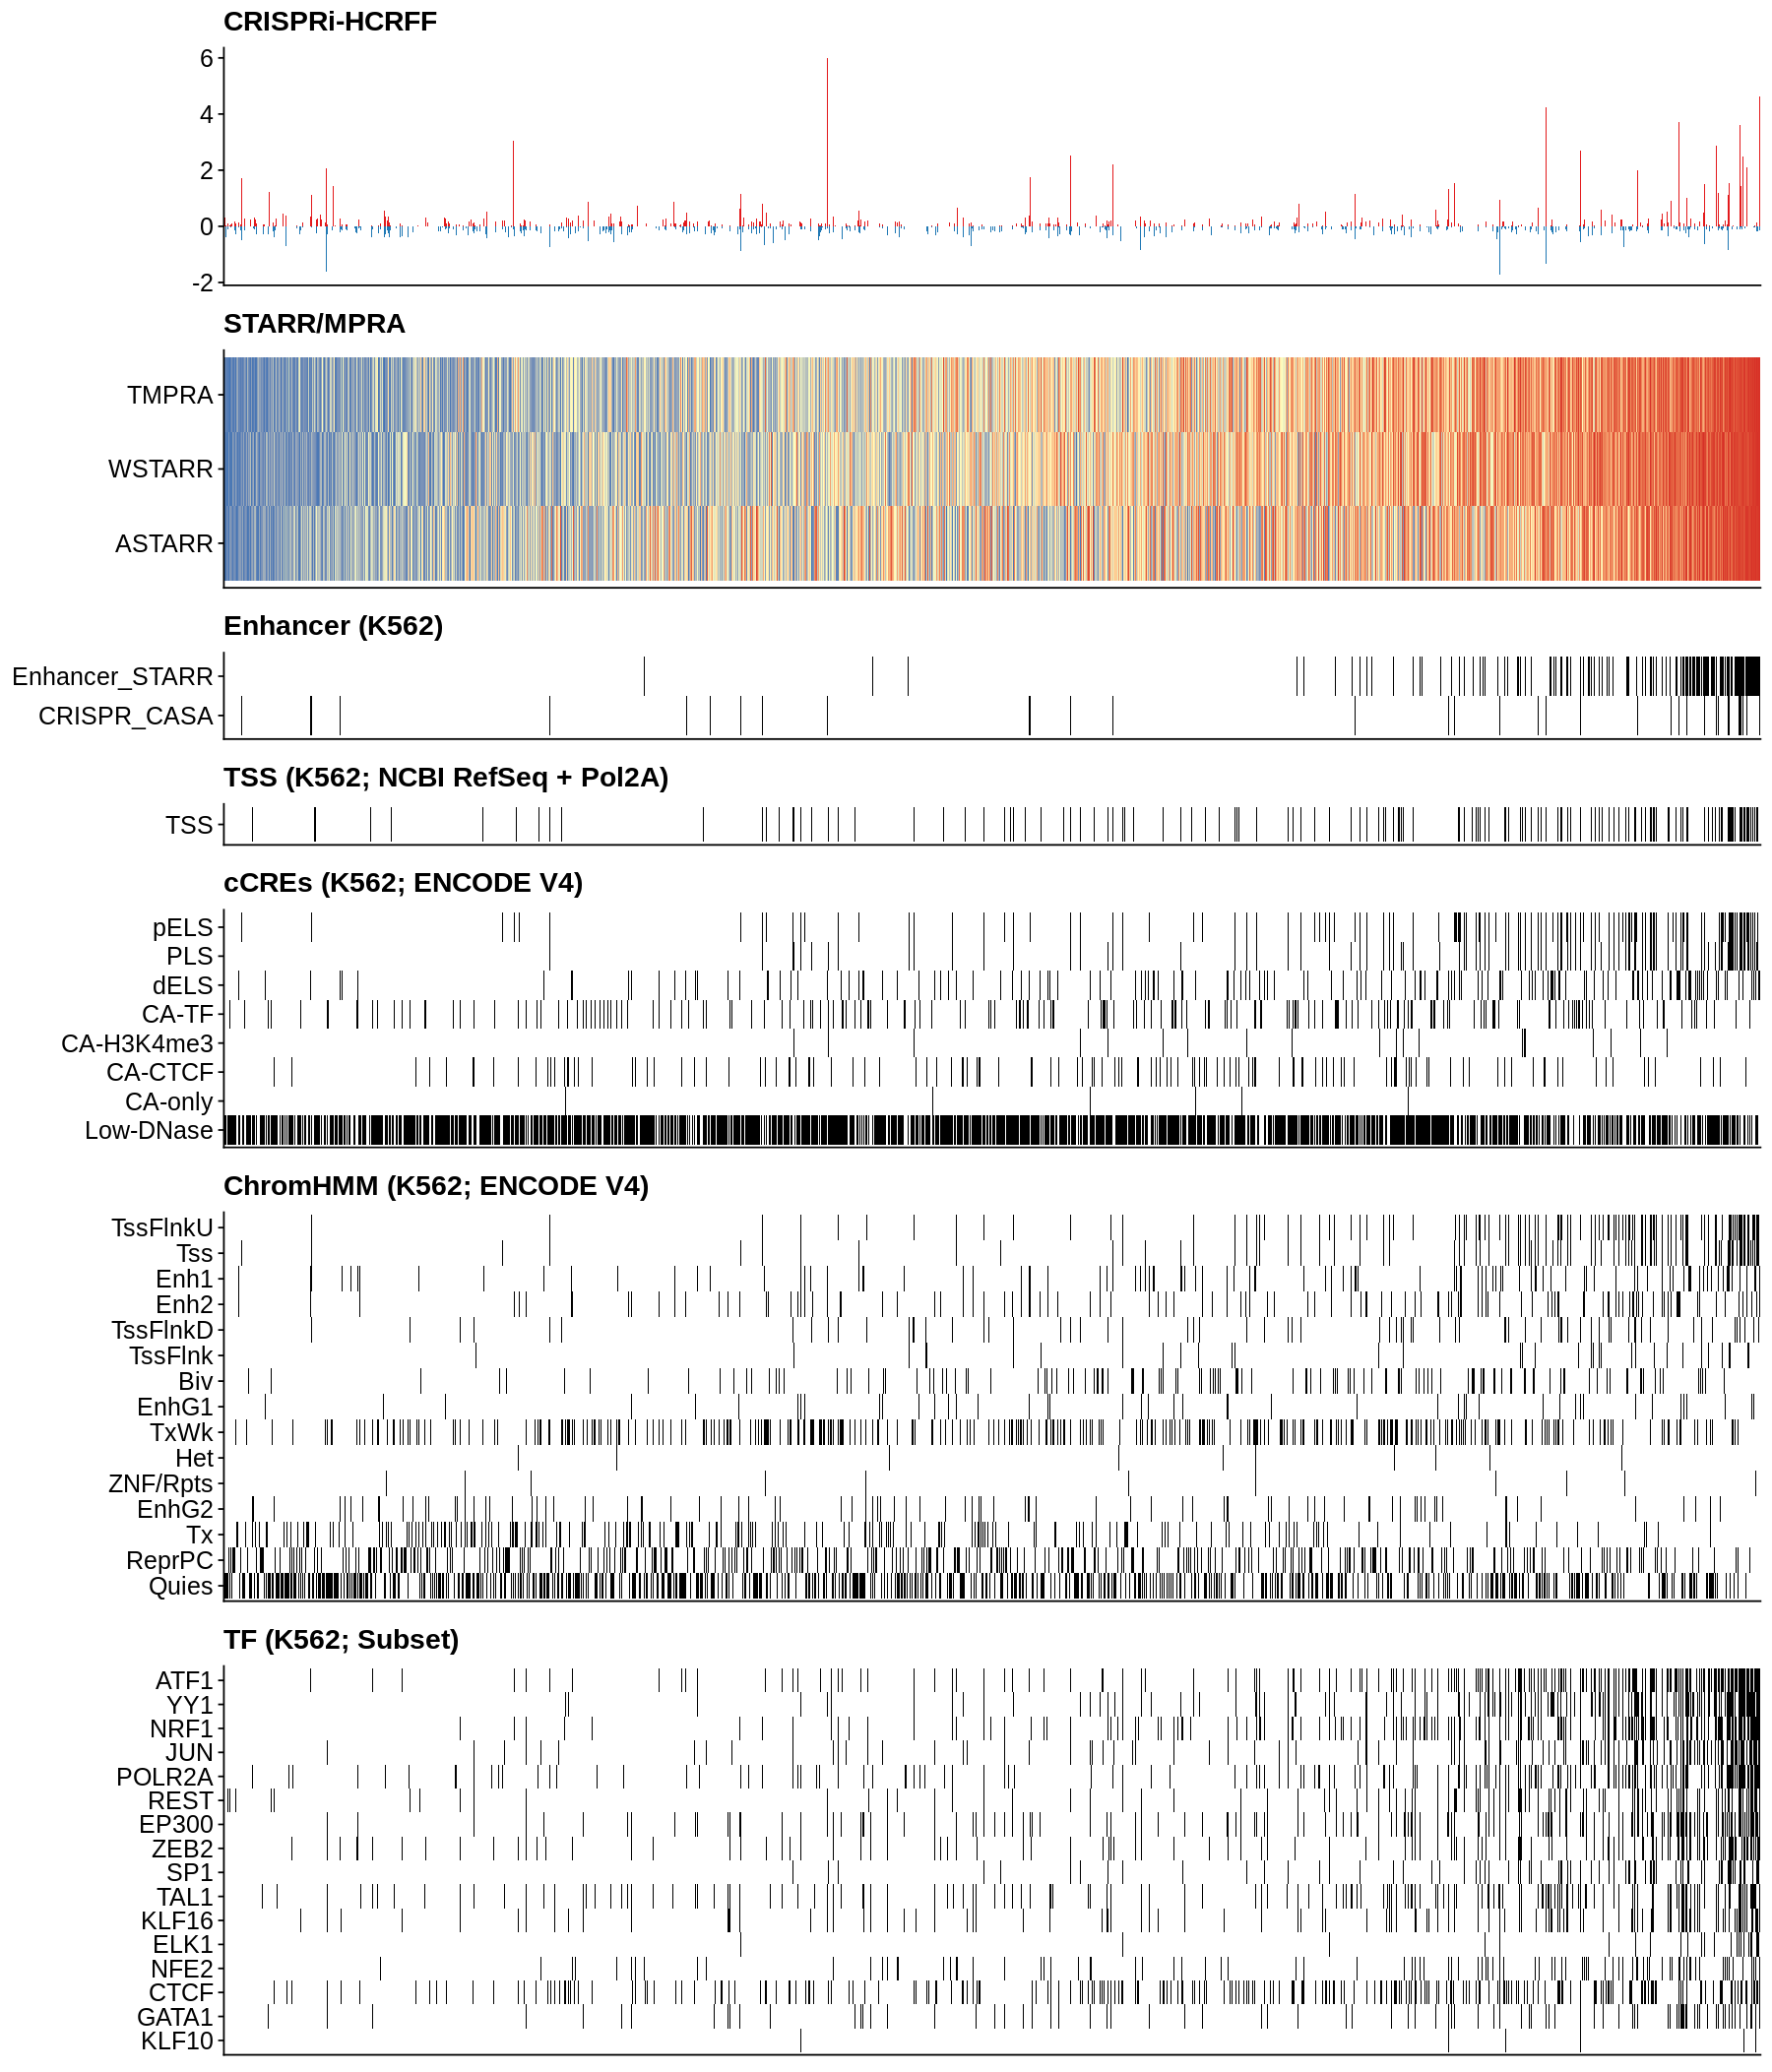

In [111]:
rel_heights_add_crispr = c(rel_heights[1], rel_heights)
lst_gpt_add_crispr = append(list(gpt_score_crispr), lst_gpt)

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt_add_crispr,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights_add_crispr)

In [118]:
theme_scale = scale_x_continuous(breaks = c(0, 1, 2, 3, seq(5, 85, by=5)))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


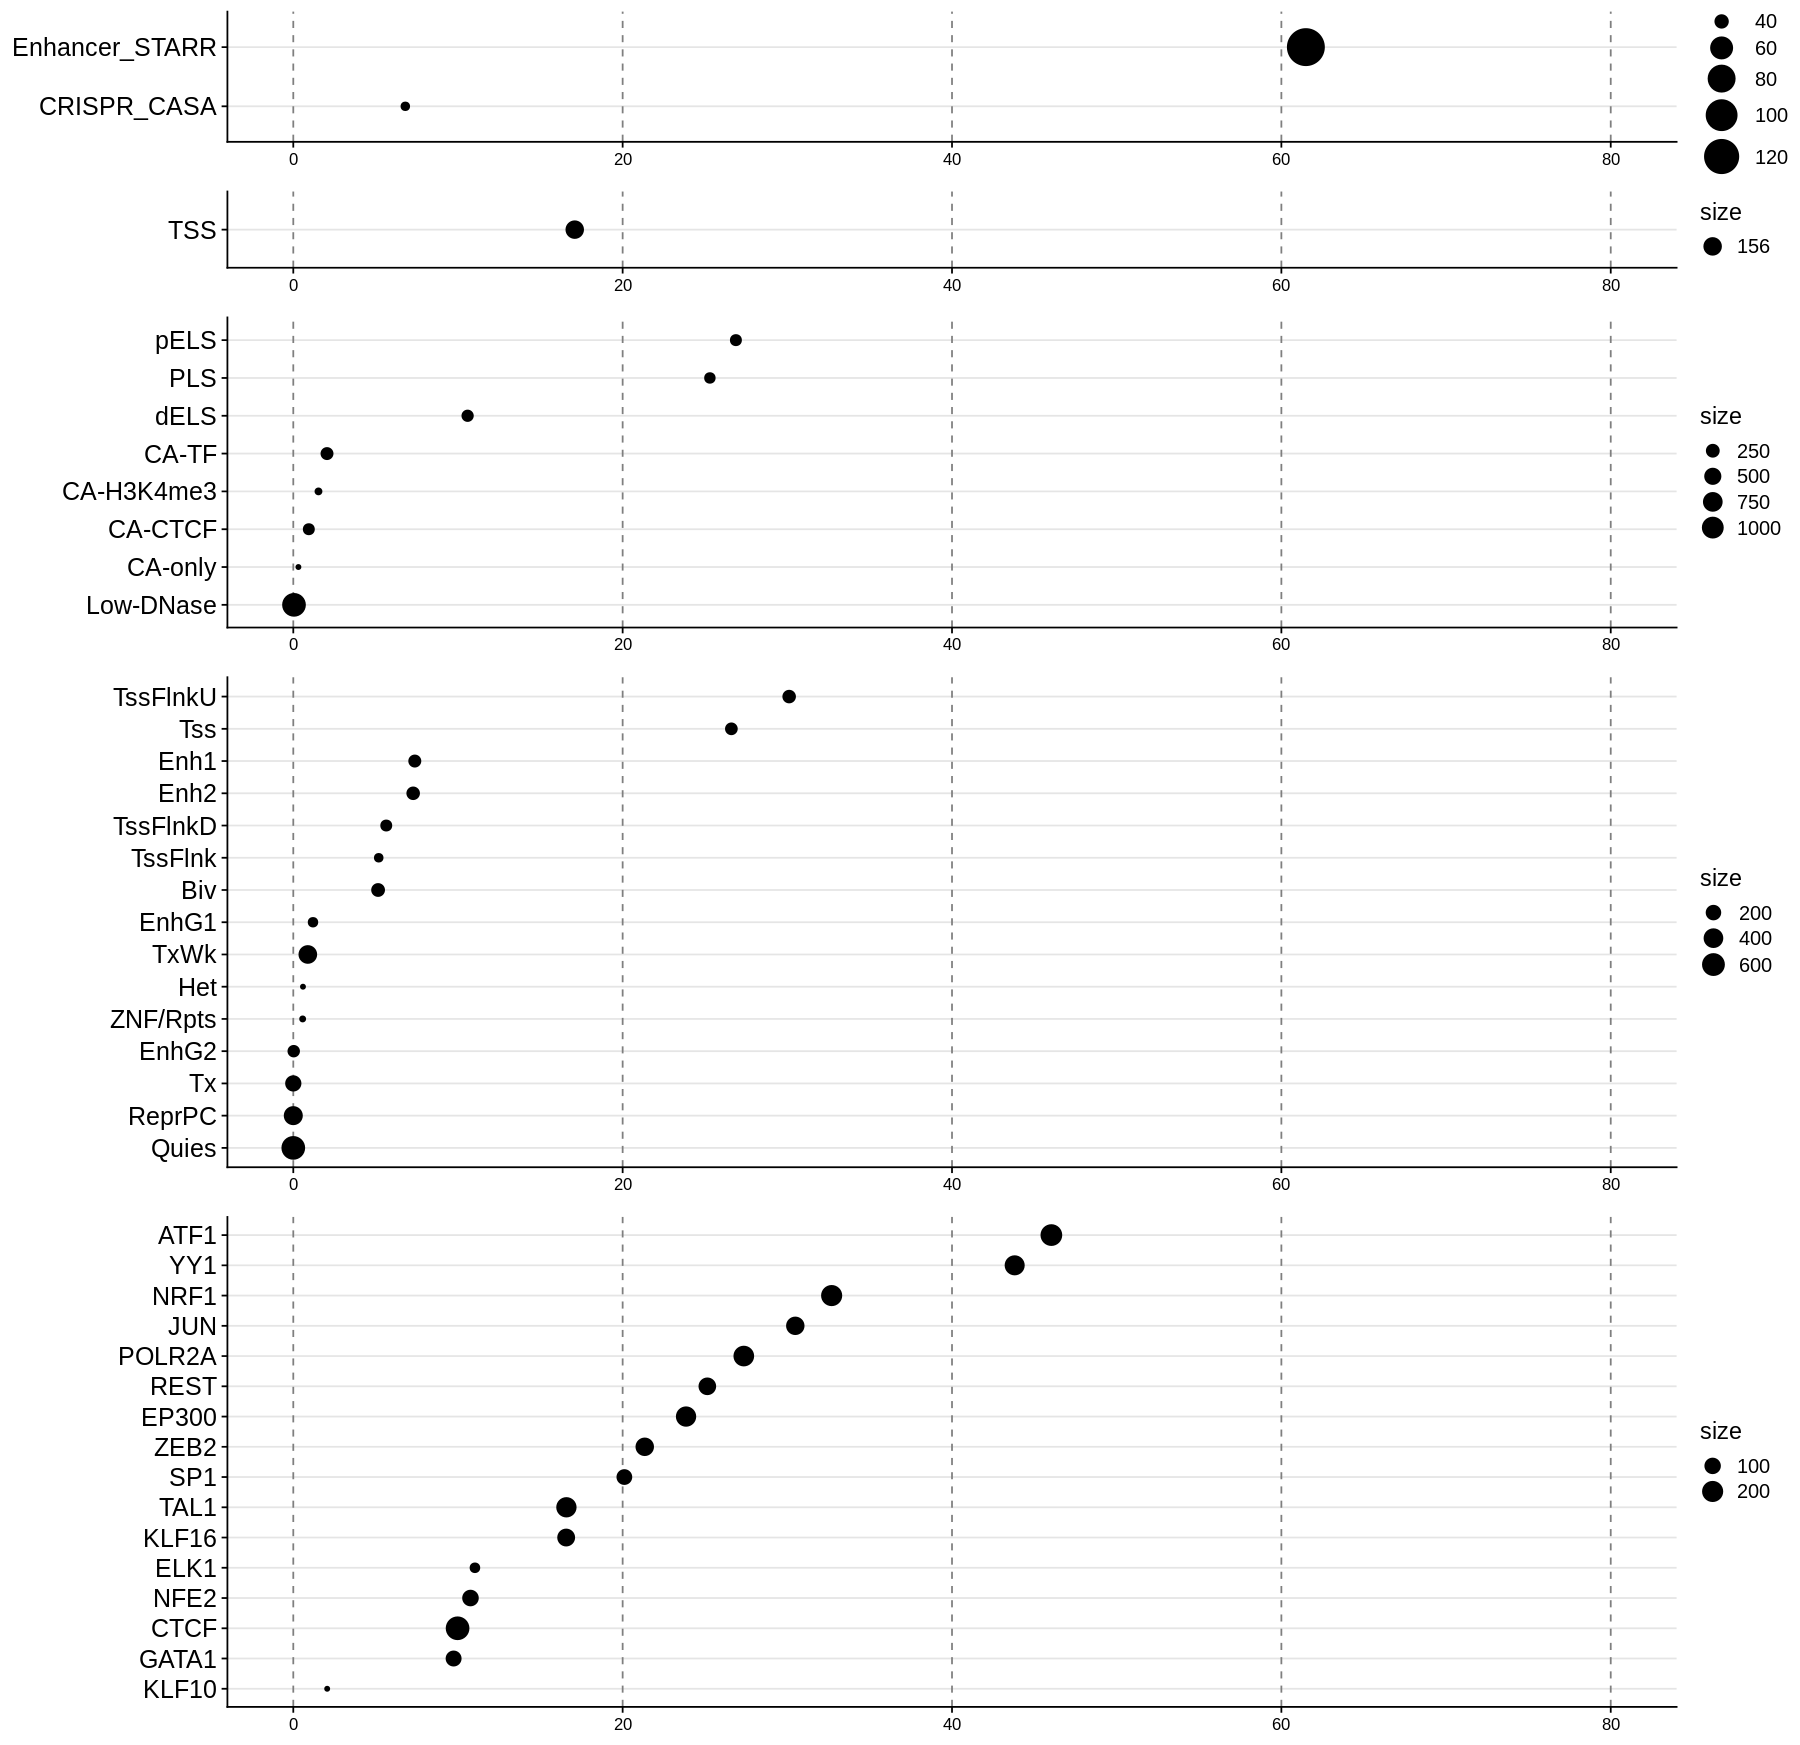

In [123]:
rel_heights = c(1, 0.7, 2, 3, 3)
lst_gpt = list(
    gpt_enrich_enhancer + xlim(0, 80), #+ theme_scale,
    gpt_enrich_tss_pol2 + xlim(0, 80), #+ theme_scale,
    gpt_enrich_ccre     + xlim(0, 80), #+ theme_scale,
    gpt_enrich_chromhmm + xlim(0, 80), #+ theme_scale,
    gpt_enrich_chipseq_tf_subset + xlim(0, 80) #+ theme_scale
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)

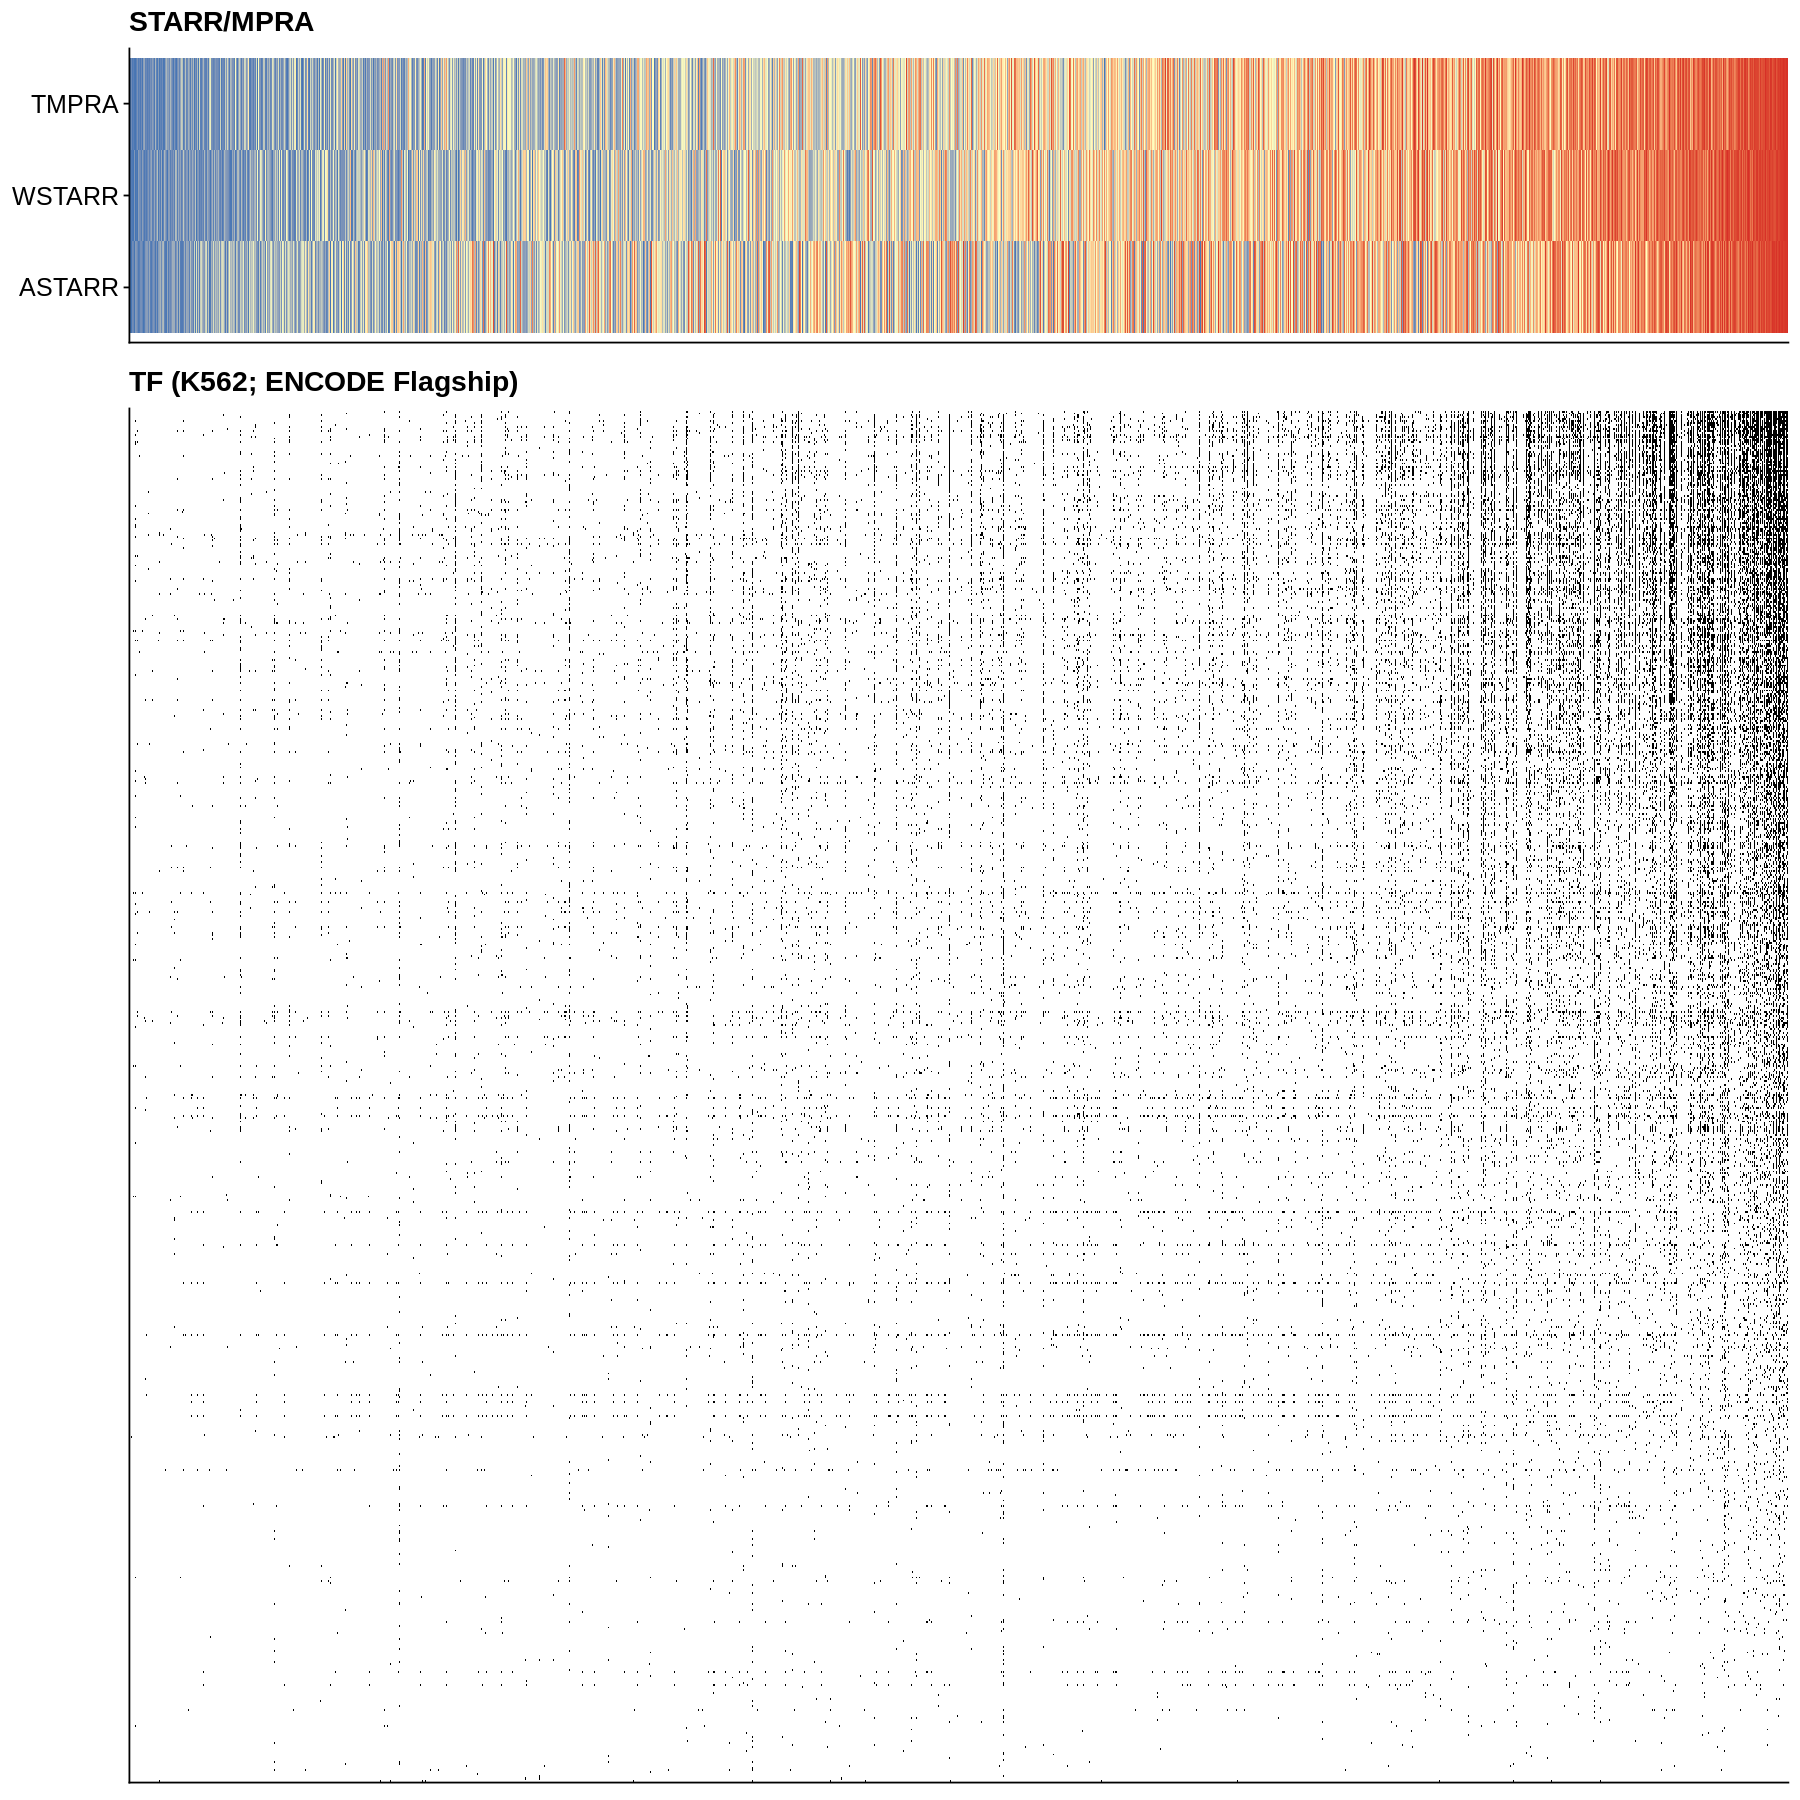

In [128]:
rel_heights = c(2, 8)
lst_gpt = list(
    gpt_score_starrmpra,
    gpt_annot_chipseq_tf
) 

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights)

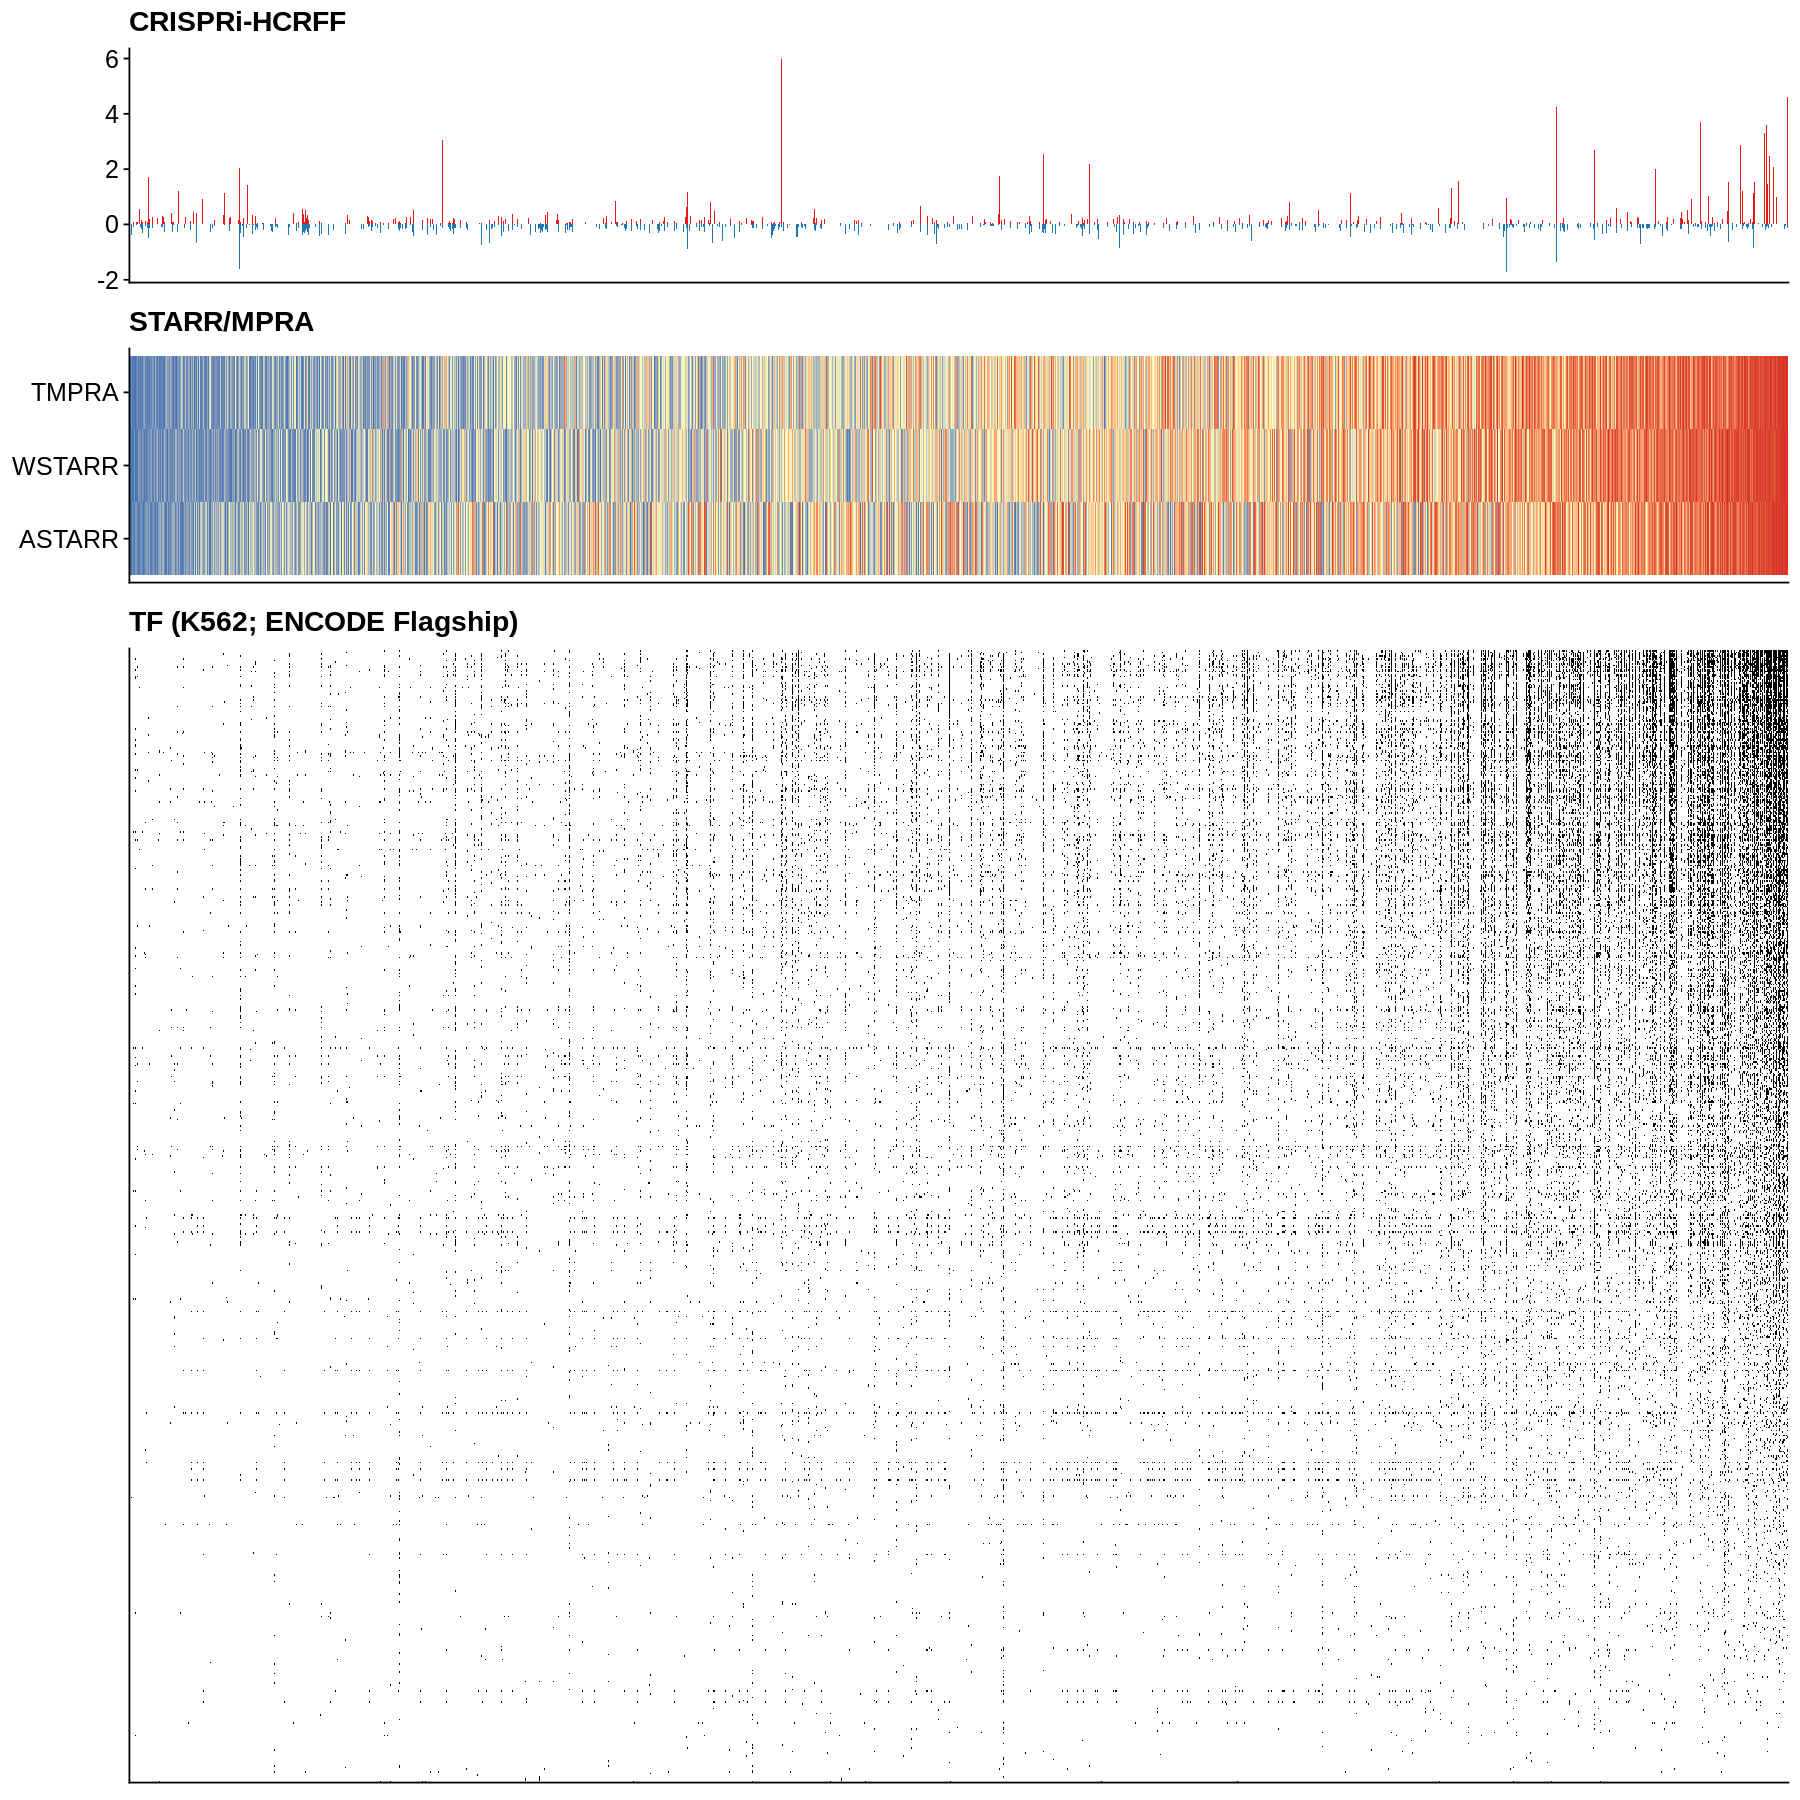

In [129]:
rel_heights_add_crispr = c(rel_heights[1], rel_heights)
lst_gpt_add_crispr = append(list(gpt_score_crispr), lst_gpt)

options(repr.plot.height=sum(rel_heights)*1.5, repr.plot.width=15)
plot_grid(
    plotlist = lst_gpt_add_crispr,
    ncol  = 1,
    align = "v",
    rel_heights = rel_heights_add_crispr)